# 1 Business Understanding 
## 1.1 Business Overview
Tomatoes (Solanum lycopersicum L) are among the world’s most important crops in terms of production, consumption, and trade. Belonging to the Solanaceae family and originating from Central and South America (Bai & Lindhout, 2007), tomatoes play a vital role in both food security and the economy. In Sub-Saharan Africa (SSA), the crop serves as a key food and cash crop, contributing significantly to nutrition, employment, and household income (FAOSTAT, 2017).

Kenya is among the leading tomato producers in SSA, with an estimated annual production of 599,458 tonnes. The crop accounts for about 7% of total horticultural output and 14% of vegetable production nationwide (Mwangi et al., 2015). Despite its importance, tomato farming faces persistent threats from diseases such as early blight, late blight, bacterial spot, and viral infections. Early and late blight (Phytophthora infestans) together account for approximately 95.8% of pre-harvest yield losses, while bacterial wilt can cause up to 100% crop loss under severe conditions (Waiganjo et al., 2006; Kamuyu, 2017).

Traditional disease diagnosis in the field relies heavily on manual inspection by farmers or agricultural experts. However, this process is often time-consuming, subjective, and prone to delays, leading to extensive crop losses. With the increasing availability of affordable smartphones and high-resolution cameras, there is now an opportunity to leverage computer vision and deep learning to automate early tomato disease detection and support farmers in timely intervention.

## 1.2 Problem Statement
Tomato farmers in Kenya and across Sub-Saharan Africa continue to suffer heavy losses due to late or inaccurate identification of plant diseases. Manual diagnosis requires expertise and time, and is not scalable to large farms. Consequently, by the time symptoms are visible or correctly identified, the infection has often spread, reducing both yield and quality.

This project aims to address this problem by developing an AI-powered tomato leaf disease detection system that can automatically identify and classify tomato leaf images into different disease categories. By providing a fast, reliable, and low-cost diagnostic solution, the model will empower farmers and agricultural officers to take early preventive actions, improving both productivity and profitability.

## 1.3 Business Objective
### 1.3.1 Main objective:
To develop a deep learning–based image classification model capable of detecting and categorizing tomato leaf diseases .

### 1.3.2 Specific objectives:
1. To preprocess and augment tomato leaf image data to improve model robustness and generalization.

2. To train a convolutional neural network (CNN) capable of distinguishing between healthy and diseased tomato leaves.

3. To evaluate model performance using metrics such as accuracy, precision, recall, and F1-score.

4. To develop a user-friendly interface ( using Streamlit application) that allows users to upload tomato leaf images and receive instant disease predictions and interventions.

5. To provide insights that support data-driven decisions in disease management, pest control, and yield protection.

## 1.4 Research Questions
1. How can image data of tomato leaves be preprocessed and augmented to ensure optimal model performance?

2. Which CNN architectures (e.g., VGG16, ResNet, MobileNet) deliver the best classification accuracy for tomato leaf disease detection?

3. How can the model’s predictions be interpreted to ensure reliability and trust for end-users (farmers and agronomists)?

4. What level of accuracy can a deep learning model achieve in classifying diseases under real-world farm conditions?

5. How can the developed system be deployed as a practical tool to support early intervention and minimize tomato yield losses?
## 1.5 Success Criteria
- Model Performance: Achieve a classification accuracy of at least 85% and an F1-score ≥ 0.85 across all disease categories.
- Usability: The model should be integrated into a simple web interface (Streamlit) that provides instant, interpretable results for uploaded images.
- Business Impact: The system should enable farmers to detect diseases early, reduce losses, and make data-informed decisions to improve yield and profitability.




# 2. Data Understanding

  ## 2.1 Data Overview

The dataset used in this study is the Tomato Leaf Diseases – Bangladesh (Mendeley Data) dataset. It was collected under natural farm conditions using smartphone cameras, representing realistic lighting, angle, and background variations that farmers typically encounter.

Each image is composed of a single leaf and a single background, for a total of 14,531 images, each labeled according to its corresponding disease category. The dataset includes both healthy leaves and several disease classes such as early blight, late blight, bacterial spot, and leaf mold.

Data Link:[ Mendeley Data – Tomato Leaf Diseases, Bangladesh](https://data.mendeley.com/datasets/ngdgg79rzb/1)

In [1]:
import sys
print(sys.executable)


c:\Users\Celine\OneDrive\Desktop\Flatiron\Assignments\CAPSTONE\venv\Scripts\python.exe


In [ ]:
# 1.1 Importing Libraries
# Core Libraries
import os
import numpy as np
import pandas as pd
import random

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Computer Vision
import cv2
import tensorflow as tf

# Model Architecture and Utilities
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras import layers, models
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam



# 1.2 Check TensorFlow and GPU
print("TensorFlow version:", tf.__version__)
print("GPU available:", tf.config.list_physical_devices('GPU'))

# 1.3 Setting  global configurations
plt.style.use('seaborn-v0_8') # this ensures every plot in the notebook has a consistent theme
sns.set_palette("deep") # for Unified color theme across plots
np.random.seed(42) # ensure reproducible results
tf.random.set_seed(42)
random.seed(42)


# 1.4 Verify directory structure
base_dir = os.getcwd()
print("Base working directory:", base_dir)


TensorFlow version: 2.20.0
GPU available: []
Base working directory: c:\Users\Celine\OneDrive\Desktop\Flatiron\Assignments\CAPSTONE\notebooks


In [3]:
# confirming tensorflow works perfectly
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
print("Keras imports successful!")


Keras imports successful!


# 2.DATA LOADING

## 2.1 Text Dataset

# Loading the interventions dataset

In [2]:
# 1.5 Verify interventions dataset
# Define path to interventions dataset
interventions_path = os.path.join(base_dir, "..", "data", "interventions", "tomato_interventions.csv")

# Load and display basic info
interventions_df = pd.read_csv(interventions_path, encoding='latin1')

print("Interventions dataset loaded successfully!")
print("Shape:", interventions_df.shape)
print("\nColumns:", interventions_df.columns.tolist())
interventions_df.head(10)


Interventions dataset loaded successfully!
Shape: (76, 4)

Columns: ['disease', 'scientific name', 'symptoms', 'interventions']


disease                        scientific name  \
0  Early blight                      Alternaria solani   
1           NaN                   Type: Fungal disease   
2           NaN                                    NaN   
3           NaN                                    NaN   
4           NaN                                    NaN   
5           NaN                                    NaN   
6           NaN                                    NaN   
7   Late blight                 Phytophthora infestans   
8           NaN  Type: Oomycete (fungus-like pathogen)   
9           NaN                                    NaN   

                                            symptoms  \
0  Dark brown to black concentric-ring (target-l...   
1  Yellowing around lesions, leading to leaf drop...   
2  Stem lesions: dark, sunken spots near soil lin...   
3  Fruit infection: dark, sunken spots near the c...   
4                                                NaN   
5                                                NaN   
6                                                NaN   
7  Large, irregular, water-soaked spots on leaves...   
8  Rapid leaf collapse and plant death in severe ...   
9  Fruits show firm, brown, greasy lesions that m...   

                                       interventions  
0                                  Cultural control:  
1  Remove infected plant debris and rotate with n...  
2  Avoid overhead watering and allow good air cir...  
3                                  Chemical control:  
4  Use fungicides such as chlorothalonil, mancoze...  
5                               Resistant varieties:  
6  Grow cultivars with EBR (early blight resistan...  
7                                  Cultural control:  
8       Use certified disease-free seed/transplants.  
9     Avoid prolonged leaf wetness and overcrowding.

- The interventions dataset is successfully loaded with 76 records and four columns: disease, scientific name, symptoms, and interventions. It provides key information linking each disease to its traits and control measures. Some rows contain missing values, likely from formatting issues, indicating a need for data cleaning.

In [5]:
# Checking for missing values in interventions dataset
interventions_df.isna().sum()


disease            67
scientific name    59
symptoms           39
interventions       0
dtype: int64

This shows that many rows in “disease” and “scientific name” are missing useful data.
- in disease - Many rows don’t repeat the disease name; they belong to the same disease section.
- scientific name - Some rows skip this because it’s mentioned once at the start of each section.
- Some rows describe interventions only, or the data was incomplete.
- Data cleaning is needed to rebuild complete records and ensure each disease is correctly linked to its symptoms and interventions

In [6]:
#Fill down disease and scientific name
# Because the missing entries belong to the previous row’s disease (like "Early blight"),we can fill down the values from above using forward fill.
interventions_df[['disease', 'scientific name']] = interventions_df[['disease', 'scientific name']].ffill()



In [7]:
# Checking for missing values in interventions dataset
interventions_df.isna().sum()


disease             0
scientific name     0
symptoms           39
interventions       0
dtype: int64

In [8]:
# dropping all other missing rows
interventions_df= interventions_df.dropna(how="all")
interventions_df.isna().sum()


disease             0
scientific name     0
symptoms           39
interventions       0
dtype: int64

In [ ]:
# Text cleaning removed unwanted symbols and standardized formatting, improving readability, aligning entries, and enhancing dataset quality for reliable analysis and integration.
# replacing weird symbols with normal ones

def clean_text(text):
    if isinstance(text, str):
        return text.replace('', '"').replace('', '"').strip()
    return text

for col in ['disease', 'scientific name', 'symptoms', 'interventions']:
    interventions_df[col] = interventions_df[col].apply(clean_text)

interventions_df.head(10)

disease                        scientific name  \
0  Early blight                      Alternaria solani   
1  Early blight                   Type: Fungal disease   
2  Early blight                   Type: Fungal disease   
3  Early blight                   Type: Fungal disease   
4  Early blight                   Type: Fungal disease   
5  Early blight                   Type: Fungal disease   
6  Early blight                   Type: Fungal disease   
7   Late blight                 Phytophthora infestans   
8   Late blight  Type: Oomycete (fungus-like pathogen)   
9   Late blight  Type: Oomycete (fungus-like pathogen)   

                                            symptoms  \
0  Dark brown to black concentric-ring ("target-l...   
1  Yellowing around lesions, leading to leaf drop...   
2  Stem lesions: dark, sunken spots near soil lin...   
3  Fruit infection: dark, sunken spots near the c...   
4                                                NaN   
5                                                NaN   
6                                                NaN   
7  Large, irregular, water-soaked spots on leaves...   
8  Rapid leaf collapse and plant death in severe ...   
9  Fruits show firm, brown, greasy lesions that m...   

                                       interventions  
0                                  Cultural control:  
1  Remove infected plant debris and rotate with n...  
2  Avoid overhead watering and allow good air cir...  
3                                  Chemical control:  
4  Use fungicides such as chlorothalonil, mancoze...  
5                               Resistant varieties:  
6  Grow cultivars with EBR (early blight resistan...  
7                                  Cultural control:  
8       Use certified disease-free seed/transplants.  
9     Avoid prolonged leaf wetness and overcrowding.

- This replaces odd characters, removes newlines inside fields, strips extra spaces so later joins are neat.

interventions and symptoms column
- Some rows have only part of the text like just “Cultural control"
- Some rows have continuations example the next row has the actual details.
- We want to combine all these rows for each disease into one clean text block.

In [10]:
# first filling missing symptoms/interventions with "empty strings" so they don’t show as "NaN".
interventions_df[['symptoms', 'interventions']] = interventions_df[['symptoms', 'interventions']].fillna('')
interventions_df.head(10)


disease                        scientific name  \
0  Early blight                      Alternaria solani   
1  Early blight                   Type: Fungal disease   
2  Early blight                   Type: Fungal disease   
3  Early blight                   Type: Fungal disease   
4  Early blight                   Type: Fungal disease   
5  Early blight                   Type: Fungal disease   
6  Early blight                   Type: Fungal disease   
7   Late blight                 Phytophthora infestans   
8   Late blight  Type: Oomycete (fungus-like pathogen)   
9   Late blight  Type: Oomycete (fungus-like pathogen)   

                                            symptoms  \
0  Dark brown to black concentric-ring ("target-l...   
1  Yellowing around lesions, leading to leaf drop...   
2  Stem lesions: dark, sunken spots near soil lin...   
3  Fruit infection: dark, sunken spots near the c...   
4                                                      
5                                                      
6                                                      
7  Large, irregular, water-soaked spots on leaves...   
8  Rapid leaf collapse and plant death in severe ...   
9  Fruits show firm, brown, greasy lesions that m...   

                                       interventions  
0                                  Cultural control:  
1  Remove infected plant debris and rotate with n...  
2  Avoid overhead watering and allow good air cir...  
3                                  Chemical control:  
4  Use fungicides such as chlorothalonil, mancoze...  
5                               Resistant varieties:  
6  Grow cultivars with EBR (early blight resistan...  
7                                  Cultural control:  
8       Use certified disease-free seed/transplants.  
9     Avoid prolonged leaf wetness and overcrowding.

In [11]:
# next we Group and merge all rows belonging to the same disease
#Each disease has several rows describing different aspects (symptoms, controls, etc.).We’ll combine them using groupby() and join().
interventions_cleaned = (
    interventions_df
    .groupby(['disease', 'scientific name'], as_index=False)
    .agg({
        'symptoms': ' '.join, 
        'interventions': ' '.join
    })
)


In [12]:
# Removing double spaces and tidy up the text
for col in ['symptoms', 'interventions']:
    interventions_cleaned[col] = interventions_cleaned[col].str.replace('\s+', ' ', regex=True).str.strip()


In [13]:
print("Cleaned dataset shape:", interventions_cleaned.shape)
interventions_cleaned.head(20)


Cleaned dataset shape: (17, 4)


disease  \
0                           Early blight   
1                           Early blight   
2                            Late blight   
3                            Late blight   
4                         bacterial spot   
5                         bacterial spot   
6                              leaf mold   
7                              leaf mold   
8                    septorial leaf spot   
9                            target spot   
10                   tomato mosaic virus   
11                   tomato mosaic virus   
12  tomato yellow leaf curl virus(TYLCV)   
13  tomato yellow leaf curl virus(TYLCV)   
14  tomato yellow leaf curl virus(TYLCV)   
15                two-spoted spider mite   
16                two-spoted spider mite   

                                      scientific name  \
0                                   Alternaria solani   
1                                Type: Fungal disease   
2                              Phytophthora infestans   
3               Type: Oomycete (fungus-like pathogen)   
4                             Type: Bacterial disease   
5   Xanthomonas campestris pv. vesicatoria (also r...   
6      Passalora fulva (formerly Cladosporium fulvum)   
7                                Type: Fungal disease   
8               Septoria lycopersici (fungal disease)   
9              Corynespora cassiicola(fungal disease)   
10         Tomato mosaic virus (ToMV)  a Tobamovirus   
11                                Type: Viral disease   
12  Tomato yellow leaf curl virus (genus Begomovir...   
13                                Type: Viral disease   
14                  Vector: Whitefly (Bemisia tabaci)   
15                                Tetranychus urticae   
16                        Type: Mite (arthropod pest)   

                                             symptoms  \
0   Dark brown to black concentric-ring ("target-l...   
1   Yellowing around lesions, leading to leaf drop...   
2   Large, irregular, water-soaked spots on leaves...   
3   Rapid leaf collapse and plant death in severe ...   
4   Leaf spots are surrounded by yellow halos and ...   
5   Small, dark brown to black, greasy-looking spo...   
6   Pale green to yellow spots on upper leaf surfa...   
7   Olive-green to grayish-purple fuzzy mold growt...   
8   Small, circular spots (23 mm) with dark brown...   
9   Circular or irregular brown lesions with conce...   
10  Light and dark green mottling ("mosaic") of le...   
11  Leaves may be distorted, fern-like, or smaller...   
12  Severe stunting of plants with small, upward-c...   
13  Drastic yield losses due to poor fruit set. Sp...   
14       Reduced leaf size and interveinal chlorosis.   
15  Tiny yellow or white speckling on upper leaf s...   
16  Fine webbing on the undersides of leaves, espe...   

                                        interventions  
0                                   Cultural control:  
1   Remove infected plant debris and rotate with n...  
2                                   Cultural control:  
3   Use certified disease-free seed/transplants. A...  
4   Use certified disease-free seed and transplant...  
5                                   Cultural control:  
6                                   Cultural control:  
7   Maintain low humidity and good ventilation (es...  
8   Cultural control: Remove and destroy infected ...  
9   Cultural control: Avoid overhead irrigation an...  
10                                  Cultural control:  
11  Use certified virus-free seeds and transplants...  
12                                  Cultural control:  
13  Remove and destroy infected plants immediately...  
14                          Use virus-free seedlings.  
15                                  Cultural control:  
16  Maintain adequate irrigation and humidity to d...

In [14]:
import re
def final_cleanup(text):
    if not isinstance(text, str):
        return text
    text = re.sub(r'(•\s*){2,}', '• ', text)  
    text = re.sub(r'\s*\n\s*•', '\n•', text)
    text = text.strip()
    return text

interventions_cleaned['interventions'] = interventions_cleaned['interventions'].apply(final_cleanup)

interventions_cleaned[['disease', 'interventions']].head(5)


disease                                      interventions
0    Early blight                                  Cultural control:
1    Early blight  Remove infected plant debris and rotate with n...
2     Late blight                                  Cultural control:
3     Late blight  Use certified disease-free seed/transplants. A...
4  bacterial spot  Use certified disease-free seed and transplant...

In [15]:
def clean_duplicate_headers(text):
    if not isinstance(text, str):
        return text

    # Fix repeating headers such as "Cultural control:" appearing multiple times
    text = re.sub(r'(•\s*Cultural control:)(?:\s*•\s*Cultural control:)+', r'\1', text)
    text = re.sub(r'(•\s*Chemical control:)(?:\s*•\s*Chemical control:)+', r'\1', text)
    text = re.sub(r'(•\s*Resistant varieties:)(?:\s*•\s*Resistant varieties:)+', r'\1', text)

    # Clean up spacing again
    text = re.sub(r'\s+', ' ', text).strip()
    return text

interventions_cleaned['interventions'] = interventions_cleaned['interventions'].apply(clean_duplicate_headers)

# Preview cleaned output
interventions_cleaned[['disease', 'interventions']].head(5)


disease                                      interventions
0    Early blight                                  Cultural control:
1    Early blight  Remove infected plant debris and rotate with n...
2     Late blight                                  Cultural control:
3     Late blight  Use certified disease-free seed/transplants. A...
4  bacterial spot  Use certified disease-free seed and transplant...

In [16]:
interventions_cleaned.head(17)

disease  \
0                           Early blight   
1                           Early blight   
2                            Late blight   
3                            Late blight   
4                         bacterial spot   
5                         bacterial spot   
6                              leaf mold   
7                              leaf mold   
8                    septorial leaf spot   
9                            target spot   
10                   tomato mosaic virus   
11                   tomato mosaic virus   
12  tomato yellow leaf curl virus(TYLCV)   
13  tomato yellow leaf curl virus(TYLCV)   
14  tomato yellow leaf curl virus(TYLCV)   
15                two-spoted spider mite   
16                two-spoted spider mite   

                                      scientific name  \
0                                   Alternaria solani   
1                                Type: Fungal disease   
2                              Phytophthora infestans   
3               Type: Oomycete (fungus-like pathogen)   
4                             Type: Bacterial disease   
5   Xanthomonas campestris pv. vesicatoria (also r...   
6      Passalora fulva (formerly Cladosporium fulvum)   
7                                Type: Fungal disease   
8               Septoria lycopersici (fungal disease)   
9              Corynespora cassiicola(fungal disease)   
10         Tomato mosaic virus (ToMV)  a Tobamovirus   
11                                Type: Viral disease   
12  Tomato yellow leaf curl virus (genus Begomovir...   
13                                Type: Viral disease   
14                  Vector: Whitefly (Bemisia tabaci)   
15                                Tetranychus urticae   
16                        Type: Mite (arthropod pest)   

                                             symptoms  \
0   Dark brown to black concentric-ring ("target-l...   
1   Yellowing around lesions, leading to leaf drop...   
2   Large, irregular, water-soaked spots on leaves...   
3   Rapid leaf collapse and plant death in severe ...   
4   Leaf spots are surrounded by yellow halos and ...   
5   Small, dark brown to black, greasy-looking spo...   
6   Pale green to yellow spots on upper leaf surfa...   
7   Olive-green to grayish-purple fuzzy mold growt...   
8   Small, circular spots (23 mm) with dark brown...   
9   Circular or irregular brown lesions with conce...   
10  Light and dark green mottling ("mosaic") of le...   
11  Leaves may be distorted, fern-like, or smaller...   
12  Severe stunting of plants with small, upward-c...   
13  Drastic yield losses due to poor fruit set. Sp...   
14       Reduced leaf size and interveinal chlorosis.   
15  Tiny yellow or white speckling on upper leaf s...   
16  Fine webbing on the undersides of leaves, espe...   

                                        interventions  
0                                   Cultural control:  
1   Remove infected plant debris and rotate with n...  
2                                   Cultural control:  
3   Use certified disease-free seed/transplants. A...  
4   Use certified disease-free seed and transplant...  
5                                   Cultural control:  
6                                   Cultural control:  
7   Maintain low humidity and good ventilation (es...  
8   Cultural control: Remove and destroy infected ...  
9   Cultural control: Avoid overhead irrigation an...  
10                                  Cultural control:  
11  Use certified virus-free seeds and transplants...  
12                                  Cultural control:  
13  Remove and destroy infected plants immediately...  
14                          Use virus-free seedlings.  
15                                  Cultural control:  
16  Maintain adequate irrigation and humidity to d...

In [17]:
# cleaning symptoms column
def clean_symptoms_text(text):
    if not isinstance(text, str) or text.strip() == "":
        return text
    
    # Remove unwanted symbols or bullets
    text = re.sub(r'•+', '', text)
    text = text.replace('\n', ' ')
    text = re.sub(r'\s+', ' ', text) #collapse multiple spaces
    
    #Strip extra whitespace
    text = text.strip()
    
    return text

# Apply the function to the symptoms column
interventions_cleaned['symptoms'] = interventions_cleaned['symptoms'].apply(clean_symptoms_text)

# Preview cleaned data
interventions_cleaned[['disease', 'scientific name', 'symptoms']].head(10)


disease                                    scientific name  \
0         Early blight                                  Alternaria solani   
1         Early blight                               Type: Fungal disease   
2          Late blight                             Phytophthora infestans   
3          Late blight              Type: Oomycete (fungus-like pathogen)   
4       bacterial spot                            Type: Bacterial disease   
5       bacterial spot  Xanthomonas campestris pv. vesicatoria (also r...   
6            leaf mold     Passalora fulva (formerly Cladosporium fulvum)   
7            leaf mold                               Type: Fungal disease   
8  septorial leaf spot              Septoria lycopersici (fungal disease)   
9          target spot             Corynespora cassiicola(fungal disease)   

                                            symptoms  
0  Dark brown to black concentric-ring ("target-l...  
1  Yellowing around lesions, leading to leaf drop...  
2  Large, irregular, water-soaked spots on leaves...  
3  Rapid leaf collapse and plant death in severe ...  
4  Leaf spots are surrounded by yellow halos and ...  
5  Small, dark brown to black, greasy-looking spo...  
6  Pale green to yellow spots on upper leaf surfa...  
7  Olive-green to grayish-purple fuzzy mold growt...  
8  Small, circular spots (23 mm) with dark brown...  
9  Circular or irregular brown lesions with conce...

In [18]:
interventions_cleaned

disease  \
0                           Early blight   
1                           Early blight   
2                            Late blight   
3                            Late blight   
4                         bacterial spot   
5                         bacterial spot   
6                              leaf mold   
7                              leaf mold   
8                    septorial leaf spot   
9                            target spot   
10                   tomato mosaic virus   
11                   tomato mosaic virus   
12  tomato yellow leaf curl virus(TYLCV)   
13  tomato yellow leaf curl virus(TYLCV)   
14  tomato yellow leaf curl virus(TYLCV)   
15                two-spoted spider mite   
16                two-spoted spider mite   

                                      scientific name  \
0                                   Alternaria solani   
1                                Type: Fungal disease   
2                              Phytophthora infestans   
3               Type: Oomycete (fungus-like pathogen)   
4                             Type: Bacterial disease   
5   Xanthomonas campestris pv. vesicatoria (also r...   
6      Passalora fulva (formerly Cladosporium fulvum)   
7                                Type: Fungal disease   
8               Septoria lycopersici (fungal disease)   
9              Corynespora cassiicola(fungal disease)   
10         Tomato mosaic virus (ToMV)  a Tobamovirus   
11                                Type: Viral disease   
12  Tomato yellow leaf curl virus (genus Begomovir...   
13                                Type: Viral disease   
14                  Vector: Whitefly (Bemisia tabaci)   
15                                Tetranychus urticae   
16                        Type: Mite (arthropod pest)   

                                             symptoms  \
0   Dark brown to black concentric-ring ("target-l...   
1   Yellowing around lesions, leading to leaf drop...   
2   Large, irregular, water-soaked spots on leaves...   
3   Rapid leaf collapse and plant death in severe ...   
4   Leaf spots are surrounded by yellow halos and ...   
5   Small, dark brown to black, greasy-looking spo...   
6   Pale green to yellow spots on upper leaf surfa...   
7   Olive-green to grayish-purple fuzzy mold growt...   
8   Small, circular spots (23 mm) with dark brown...   
9   Circular or irregular brown lesions with conce...   
10  Light and dark green mottling ("mosaic") of le...   
11  Leaves may be distorted, fern-like, or smaller...   
12  Severe stunting of plants with small, upward-c...   
13  Drastic yield losses due to poor fruit set. Sp...   
14       Reduced leaf size and interveinal chlorosis.   
15  Tiny yellow or white speckling on upper leaf s...   
16  Fine webbing on the undersides of leaves, espe...   

                                        interventions  
0                                   Cultural control:  
1   Remove infected plant debris and rotate with n...  
2                                   Cultural control:  
3   Use certified disease-free seed/transplants. A...  
4   Use certified disease-free seed and transplant...  
5                                   Cultural control:  
6                                   Cultural control:  
7   Maintain low humidity and good ventilation (es...  
8   Cultural control: Remove and destroy infected ...  
9   Cultural control: Avoid overhead irrigation an...  
10                                  Cultural control:  
11  Use certified virus-free seeds and transplants...  
12                                  Cultural control:  
13  Remove and destroy infected plants immediately...  
14                          Use virus-free seedlings.  
15                                  Cultural control:  
16  Maintain adequate irrigation and humidity to d...

#### Data Cleaning Process for the Interventions Dataset
1. Data Loading and Initial Inspection
The dataset was first loaded into a pandas DataFrame and examined to understand its structure, check for missing values, and identify inconsistencies in formatting across all 4 columns.
2. Handling Missing and Irrelevant Entries
    - Rows containing empty or null entries in the disease or interventions columns were removed.
    - Duplicate records were dropped to ensure each disease-intervention pair was unique.
3. Standardizing Text Cases
    - All disease names and intervention descriptions were converted to lowercase for uniformity and ease of matching during later analysis.
4. Removing Unnecessary Symbols and Whitespace
    - Extra bullet points and multiple consecutive symbols were reduced to a single consistent format.
    - Unwanted newline spaces and leading or trailing whitespaces were removed to enhance readability.
5. Column Validation and Alignment
    - Verified that each disease correctly corresponded with its scientific name, symptom description, and intervention measures.
6. Final Review and Verification
    - The cleaned dataset was reviewed to confirm structural consistency, readable text, and logical linkage among diseases, their scientific names, symptoms, and interventions.

## 2.2 Image Dataset

# Preprocesssed Dataset


In [3]:
# Loading the dataset with images
data_dir = os.path.join(base_dir, '..', 'data', 'preprocessed')
data_dir = os.path.abspath(data_dir)
print("Dataset directory:", data_dir)

classes = os.listdir(data_dir)
print("Classes found:", classes)
print("Total classes:", len(classes))


Dataset directory: c:\Users\Celine\OneDrive\Desktop\Flatiron\Assignments\CAPSTONE\data\preprocessed
Classes found: ['Bacterial_spot227', 'Early_blight227', 'healthy227', 'Late_blight227', 'Leaf_Mold227', 'Septoria_leaf_spot227', 'Target_Spot227', 'Tomato_mosaic_virus227', 'Tomato_Yellow_Leaf_Curl_Virus227', 'Two-spotted_spider_mite227']
Total classes: 10


- A total of 10 classes are found.

In [4]:
# Count of images per class
class_counts = []
for cls in classes:
    cls_path = os.path.join(data_dir, cls)
    num_images = len(os.listdir(cls_path))
    class_counts.append((cls, num_images))

df_counts = pd.DataFrame(class_counts, columns=["Class", "Image_Count"])
print(df_counts)


                              Class  Image_Count
0                 Bacterial_spot227         1702
1                   Early_blight227          800
2                        healthy227         1272
3                    Late_blight227         1528
4                      Leaf_Mold227          762
5             Septoria_leaf_spot227         1417
6                    Target_Spot227         1124
7            Tomato_mosaic_virus227          299
8  Tomato_Yellow_Leaf_Curl_Virus227         4286
9        Two-spotted_spider_mite227         1341


C:\Users\Celine\AppData\Local\Temp\ipykernel_5444\772886128.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_counts, x="Class", y="Image_Count", palette="viridis")


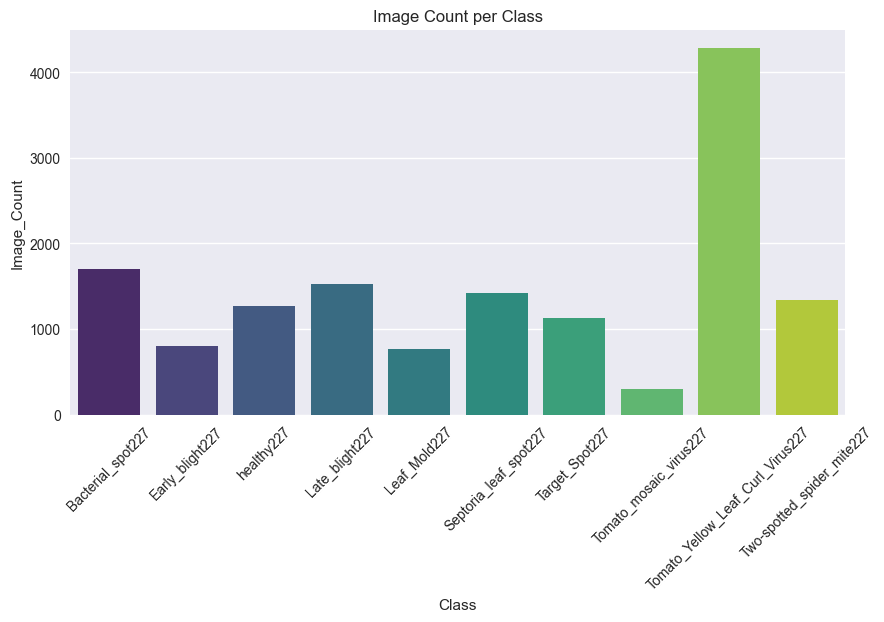

In [21]:
# Visualization of the classes
plt.figure(figsize=(10,5))
sns.barplot(data=df_counts, x="Class", y="Image_Count", palette="viridis")
plt.title("Image Count per Class")
plt.xticks(rotation=45)
plt.show()


- The dataset contains 10 tomato leaf classes with varying image counts. Tomato_Yellow_Leaf_Curl_Virus227 has the most images of 4,286, while Tomato_mosaic_virus 227 has the fewest of 299, indicating class imbalance.

# 3.splitting the data

In [22]:
# splitting the dataset into train/validation/test sets
# We’ll create three subfolders: train, val, and test 
import splitfolders

splitfolders.ratio(
    data_dir,
    output=os.path.join(base_dir, 'data_split'),
    seed=42,
    ratio=(0.7, 0.15, 0.15) #70% train, 15% val, 15% test
)


In [5]:
# creating tensorflow datasets directly from the plit folders

img_height, img_width = 128, 128
batch_size = 32

train_ds = image_dataset_from_directory(
    os.path.join(base_dir, 'data_split', 'train'),
    image_size=(img_height, img_width),
    batch_size=batch_size
)

val_ds = image_dataset_from_directory(
    os.path.join(base_dir, 'data_split', 'val'),
    image_size=(img_height, img_width),
    batch_size=batch_size
)

test_ds = image_dataset_from_directory(
    os.path.join(base_dir, 'data_split', 'test'),
    image_size=(img_height, img_width),
    batch_size=batch_size
)



class_names = train_ds.class_names
print("Classes:", class_names)
print("Total classes:", len(class_names))


Found 10167 files belonging to 10 classes.
Found 2175 files belonging to 10 classes.
Found 2189 files belonging to 10 classes.
Classes: ['Bacterial_spot227', 'Early_blight227', 'Late_blight227', 'Leaf_Mold227', 'Septoria_leaf_spot227', 'Target_Spot227', 'Tomato_Yellow_Leaf_Curl_Virus227', 'Tomato_mosaic_virus227', 'Two-spotted_spider_mite227', 'healthy227']
Total classes: 10


- The TensorFlow datasets are successfully created, containing 10 classes. The training set has 10,167 images, the    validation set 2,175 images, and the test set 2,189 images, maintaining the class structure from the original dataset.

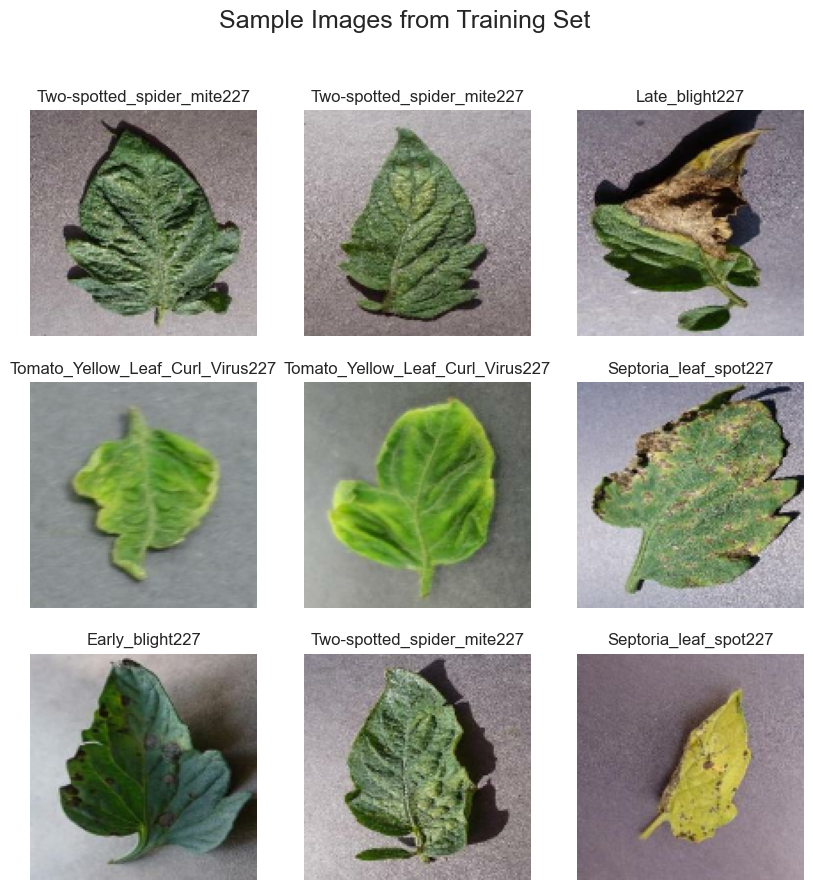

In [5]:

# Visualize samples
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")
plt.suptitle("Sample Images from Training Set", fontsize=18)
plt.show()


In [ ]:
#Optimizing input pipeline for faster and smoother training.
# by caching, shuffling, and prefetching with AUTOTUNE
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

print("Datasets cached, shuffled, and prefetched successfully.")


Datasets cached, shuffled, and prefetched successfully.


2. DATA AUGMENTATION

c:\Users\Celine\OneDrive\Desktop\Flatiron\Assignments\CAPSTONE\venv\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


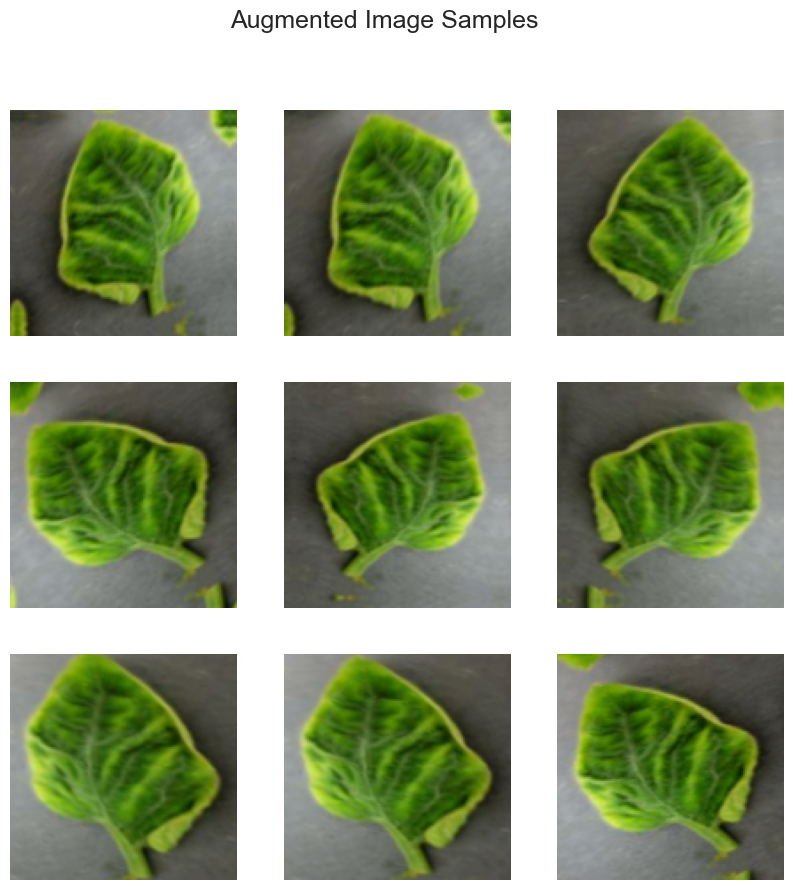

In [8]:
from tensorflow.keras import layers, Sequential

 #performing data augmentation to Increase dataset variability and improve generalization.

data_augmentation = Sequential([
    layers.RandomFlip("horizontal", input_shape=(img_height, img_width, 3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
    layers.RandomContrast(0.1)
])

# Visualizing augmented samples
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
    for i in range(9):
        augmented_image = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_image[0].numpy().astype("uint8"))
        plt.axis("off")
plt.suptitle("Augmented Image Samples", fontsize=18)
plt.show()


# 4.Building the baseline model

In [27]:
from tensorflow.keras import models

#  Kept preprocessing(normalization/rescaling) and augmentation inside the model for cleaner deployment.
num_classes = len(class_names)

model = models.Sequential([
    data_augmentation,
    layers.Rescaling(1./255),

    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])

model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling (Rescaling)           │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,305,930 (12.61 MB)

 Trainable params: 3,305,930 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [28]:
# compiling the model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [29]:
#Training the model with callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
checkpoint = ModelCheckpoint("best_model.keras", save_best_only=True)

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=25,
    callbacks=[early_stop, checkpoint]
)


Epoch 1/25
318/318 ━━━━━━━━━━━━━━━━━━━━ 147s 452ms/step - accuracy: 0.4836 - loss: 1.4978 - val_accuracy: 0.6906 - val_loss: 0.9310
Epoch 2/25
318/318 ━━━━━━━━━━━━━━━━━━━━ 70s 220ms/step - accuracy: 0.6698 - loss: 0.9588 - val_accuracy: 0.7683 - val_loss: 0.7035
Epoch 3/25
318/318 ━━━━━━━━━━━━━━━━━━━━ 75s 237ms/step - accuracy: 0.7323 - loss: 0.7754 - val_accuracy: 0.8023 - val_loss: 0.5682
Epoch 4/25
318/318 ━━━━━━━━━━━━━━━━━━━━ 72s 227ms/step - accuracy: 0.7752 - loss: 0.6551 - val_accuracy: 0.7816 - val_loss: 0.6596
Epoch 5/25
318/318 ━━━━━━━━━━━━━━━━━━━━ 74s 232ms/step - accuracy: 0.7825 - loss: 0.6311 - val_accuracy: 0.8791 - val_loss: 0.3724
Epoch 6/25
318/318 ━━━━━━━━━━━━━━━━━━━━ 72s 225ms/step - accuracy: 0.8161 - loss: 0.5300 - val_accuracy: 0.8745 - val_loss: 0.3699
Epoch 7/25
318/318 ━━━━━━━━━━━━━━━━━━━━ 71s 223ms/step - accuracy: 0.8242 - loss: 0.5014 - val_accuracy: 0.8874 - val_loss: 0.3496
Epoch 8/25
318/318 ━━━━━━━━━━━━━━━━━━━━ 72s 226ms/step - accuracy: 0.8415 - loss: 

In [ ]:
#  Evaluating the  model
val_loss, val_acc = model.evaluate(val_ds)
test_loss, test_acc = model.evaluate(test_ds)

print(f"Validation Accuracy: {val_acc:.2f}, Loss: {val_loss:.2f}")
print(f"Test Accuracy: {test_acc:.2f}, Loss: {test_loss:.2f}")


68/68 ━━━━━━━━━━━━━━━━━━━━ 5s 73ms/step - accuracy: 0.9352 - loss: 0.1974
69/69 ━━━━━━━━━━━━━━━━━━━━ 8s 103ms/step - accuracy: 0.9269 - loss: 0.2108
Validation Accuracy: 0.94, Loss: 0.20
Test Accuracy: 0.93, Loss: 0.21


- The model is performing very well on both training and validation data ,with a small range between their accuracy indicating lack of overfittting.

In [31]:
#print the parameter
print(history.params)

{'verbose': 'auto', 'epochs': 25, 'steps': 318}


- The training history indicates that the model was set to train for 25 epochs, with 318 steps per epoch, and verbosity is set to 'auto'

In [32]:
#history accuracy
history.history["accuracy"]

[0.4836234748363495,
 0.6698141098022461,
 0.7322710752487183,
 0.7751548886299133,
 0.78253173828125,
 0.816071629524231,
 0.8242352604866028,
 0.8415461778640747,
 0.8541359305381775,
 0.8582669496536255,
 0.8711517453193665,
 0.8697747588157654,
 0.8823645114898682,
 0.8897413015365601,
 0.8911183476448059,
 0.8962329030036926,
 0.9050850868225098,
 0.9092161059379578,
 0.9068555235862732,
 0.9119700789451599]

- The training accuracy steadily improves from 48% in the first epoch to over 91% by epoch 20, reflecting consistent learning and progressive model convergence.

In [33]:
#print length of accuracy in history
len(history.history['accuracy'])

20

In [34]:

# Getting the accuracy and loss values from history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

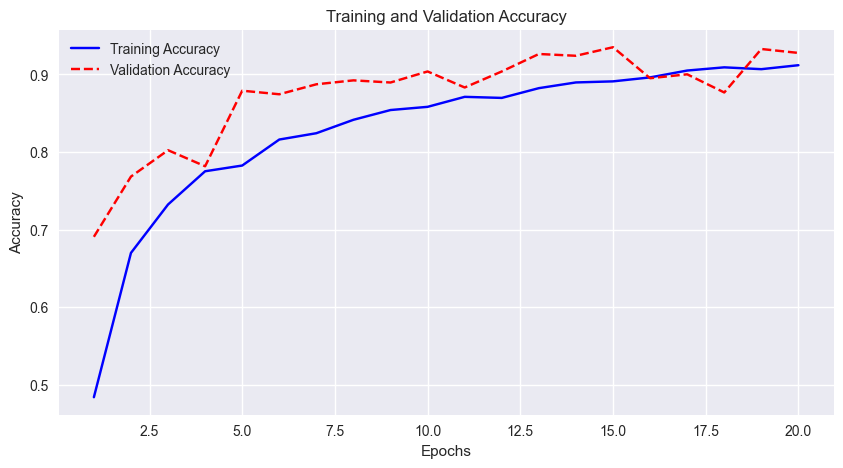

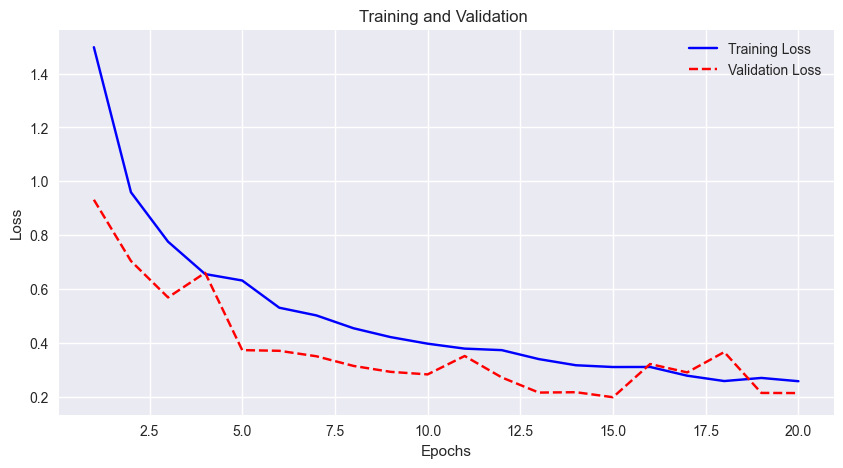

In [35]:
# visualizing the model accuracy and loss
epochs = range(1, len(acc) + 1)

# Plot accuracy
plt.figure(figsize=(10, 5))
plt.plot(epochs, acc, 'b-', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r--', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.title('Training and Validation Accuracy')
plt.show()

# Plot loss
plt.figure(figsize=(10, 5))
plt.plot(epochs, loss, 'b-', label='Training Loss')
plt.plot(epochs, val_loss, 'r--', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation ')
plt.grid(True)
plt.show()


In [36]:
# loading the best model

from tensorflow.keras.models import load_model
model = load_model("best_model.keras")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

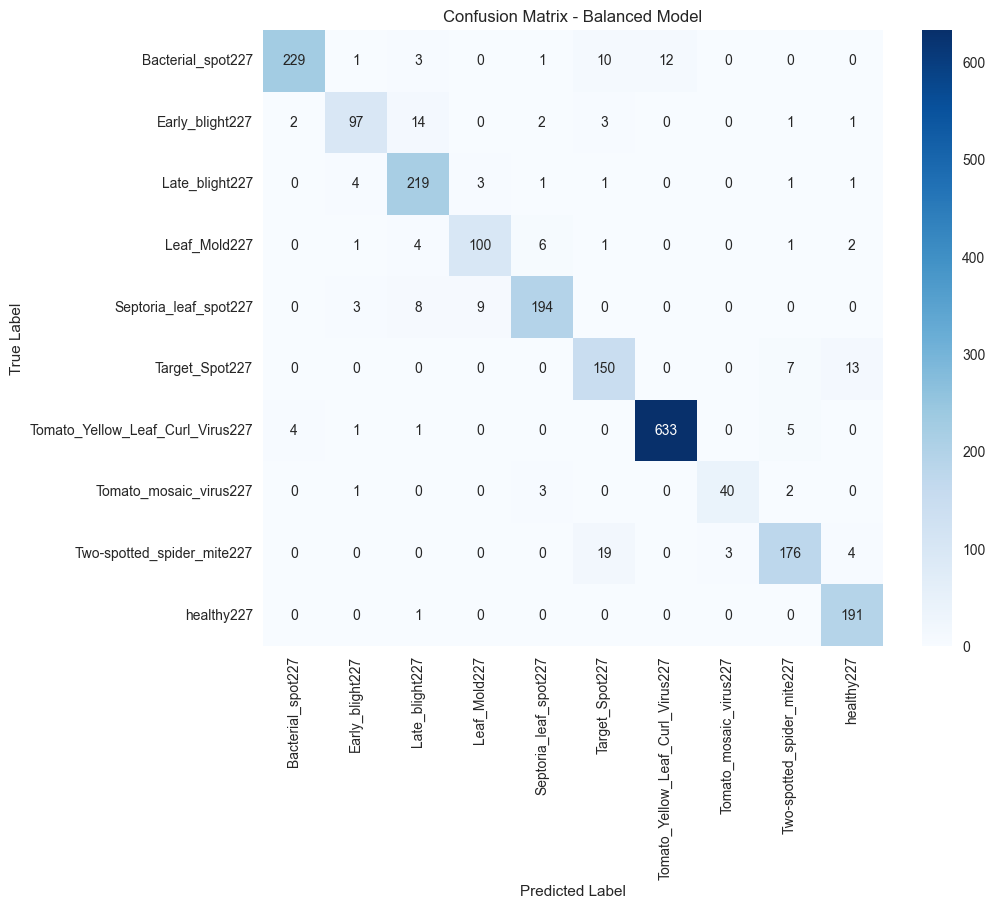

Classification Report:

                                  precision    recall  f1-score   support

               Bacterial_spot227       0.97      0.89      0.93       256
                 Early_blight227       0.90      0.81      0.85       120
                  Late_blight227       0.88      0.95      0.91       230
                    Leaf_Mold227       0.89      0.87      0.88       115
           Septoria_leaf_spot227       0.94      0.91      0.92       214
                  Target_Spot227       0.82      0.88      0.85       170
Tomato_Yellow_Leaf_Curl_Virus227       0.98      0.98      0.98       644
          Tomato_mosaic_virus227       0.93      0.87      0.90        46
      Two-spotted_spider_mite227       0.91      0.87      0.89       202
                      healthy227       0.90      0.99      0.95       192

                        accuracy                           0.93      2189
                       macro avg       0.91      0.90      0.91      2189
            

In [37]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Get predictions
y_true = []
y_pred = []

for images, labels in test_ds:
    preds =model.predict(images)
    y_true.extend(labels.numpy())
    y_pred.extend(np.argmax(preds, axis=1))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Balanced Model')
plt.show()

# Classification Report
print("Classification Report:\n")
print(classification_report(y_true, y_pred, target_names=class_names))


The model achieves 93% accuracy on the test set, with balanced performance across all classes, effectively distinguishing between tomato diseases and healthy leaves.

Predicting the first image


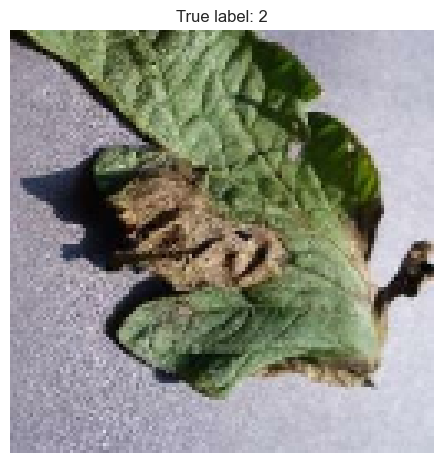

In [38]:
# visual for 1 image showing the True label
for images, labels in test_ds.take(1):
    image1 = images[0].numpy().astype('uint8')
    label1 = labels[0].numpy()

    print("Predicting the first image")

    plt.imshow(image1)
    plt.title(f"True label: {label1}")
    plt.axis('off')
    plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


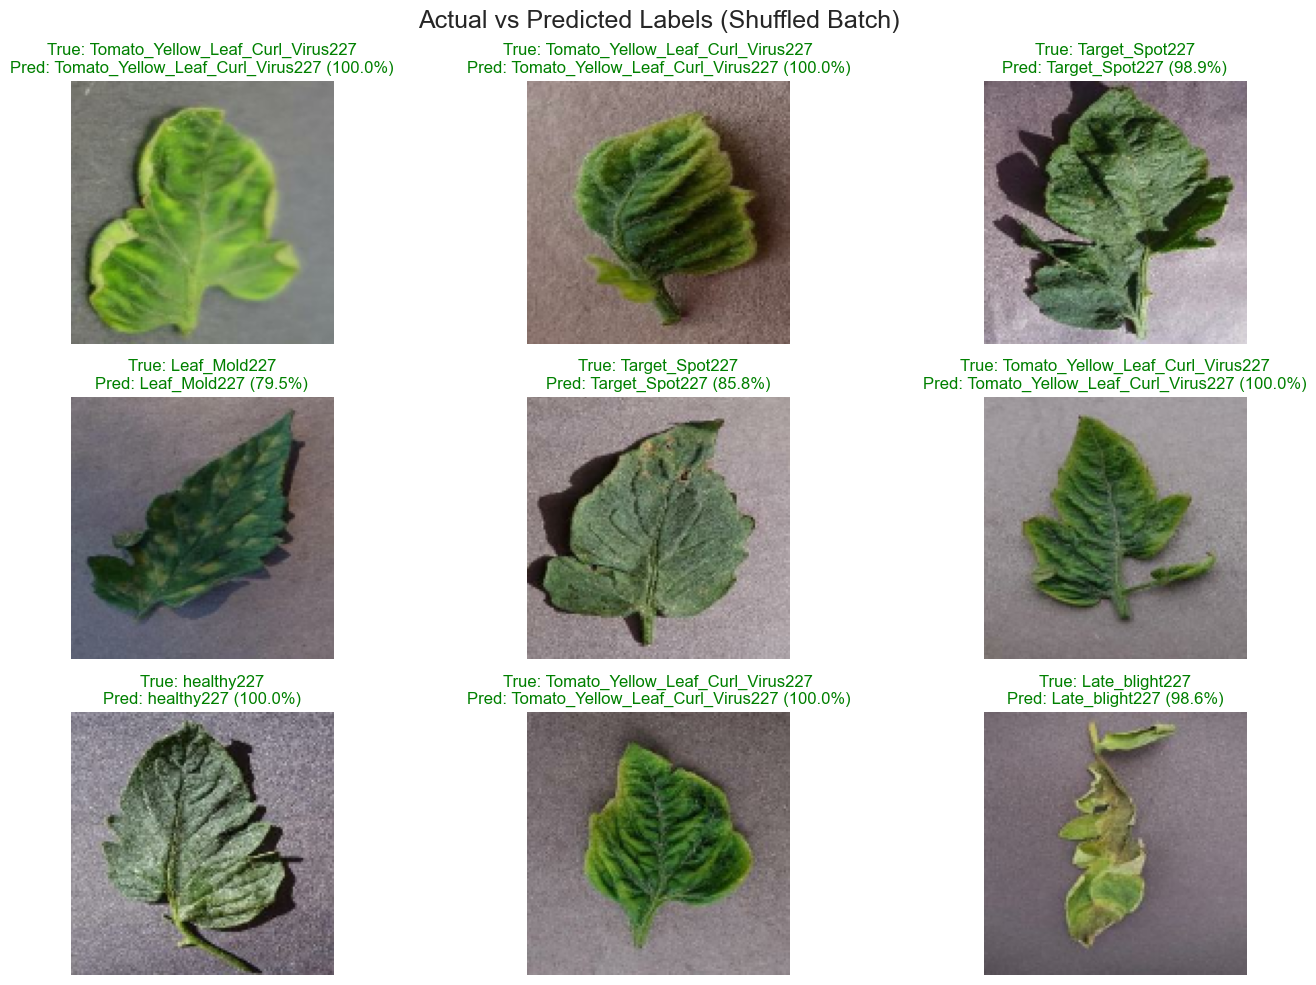

In [39]:
# Shuffle test dataset before taking a batch
shuffled_test_ds = test_ds.shuffle(buffer_size=1000, seed=42)

# Visualizing actual vs predicted labels with color coding
for images, labels in shuffled_test_ds.take(1):
    batch_predictions = model.predict(images)  # Predictions for the batch

    plt.figure(figsize=(15, 10))

    # Display first 9 random images from the shuffled batch
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        img = images[i].numpy().astype("uint8")
        true_label = class_names[labels[i].numpy()]
        pred_label = class_names[np.argmax(batch_predictions[i])]
        confidence = np.max(batch_predictions[i]) * 100

        plt.imshow(img)
        
        # Color: green if correct, red if wrong
        color = "green" if pred_label == true_label else "red"
        plt.title(f"True: {true_label}\nPred: {pred_label} ({confidence:.1f}%)", color=color)
        plt.axis("off")

    plt.suptitle("Actual vs Predicted Labels (Shuffled Batch)", fontsize=18)
    plt.tight_layout()
    plt.show()


The first CNN model demonstrates strong and balanced performance in classifying tomato leaf diseases, achieving 91.2% training accuracy, 92.8% validation accuracy, and 93% test accuracy, with corresponding losses of 0.26, 0.21, and 0.21. Its three convolutional layers (32, 64, 128 filters), dropout (0.5), and data augmentation enable effective feature learning. The model generalizes well with no overfitting, providing a stable baseline, though recall for Early_blight and Target_Spot could be further improved through class balancing.

# 5.Model with Balanced class weights

In [40]:
# displaying the classes
print("Using previously saved class names:", class_names)


Using previously saved class names: ['Bacterial_spot227', 'Early_blight227', 'Late_blight227', 'Leaf_Mold227', 'Septoria_leaf_spot227', 'Target_Spot227', 'Tomato_Yellow_Leaf_Curl_Virus227', 'Tomato_mosaic_virus227', 'Two-spotted_spider_mite227', 'healthy227']


In [41]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Collect all labels from the training dataset
y_train = np.concatenate([labels.numpy() for _, labels in train_ds])

# Compute class weights
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.arange(num_classes),
    y=y_train
)

# Convert to dictionary (Keras expects this format)
class_weights = dict(enumerate(class_weights))
print("Class Weights:", class_weights)


Class Weights: {0: np.float64(0.8536523929471033), 1: np.float64(1.8155357142857143), 2: np.float64(0.9510757717492984), 3: np.float64(1.9075046904315196), 4: np.float64(1.025933400605449), 5: np.float64(1.2935114503816794), 6: np.float64(0.3389), 7: np.float64(4.864593301435407), 8: np.float64(1.0839019189765458), 9: np.float64(1.1423595505617978)}


In [42]:
from tensorflow.keras.models import clone_model

# Clone the baseline model architecture to ensure consistency
balanced_model = clone_model(model)

# Recompile the cloned model
balanced_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [43]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint_path = "best_balanced_model.keras"

checkpoint_cb = ModelCheckpoint(
    filepath=checkpoint_path,
    monitor='val_accuracy',
    save_best_only=True,
    mode='max',
    verbose=1
)


In [44]:
history_balanced = balanced_model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=25,
    class_weight=class_weights, # balance the classes
    callbacks=[checkpoint_cb]
)


Epoch 1/25
318/318 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step - accuracy: 0.2320 - loss: 2.2385
Epoch 1: val_accuracy improved from None to 0.56920, saving model to best_balanced_model.keras
318/318 ━━━━━━━━━━━━━━━━━━━━ 79s 236ms/step - accuracy: 0.3283 - loss: 2.0497 - val_accuracy: 0.5692 - val_loss: 1.3537
Epoch 2/25
318/318 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step - accuracy: 0.4173 - loss: 1.7904
Epoch 2: val_accuracy improved from 0.56920 to 0.61701, saving model to best_balanced_model.keras
318/318 ━━━━━━━━━━━━━━━━━━━━ 81s 234ms/step - accuracy: 0.4382 - loss: 1.7416 - val_accuracy: 0.6170 - val_loss: 1.1557
Epoch 3/25
318/318 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step - accuracy: 0.5024 - loss: 1.5665
Epoch 3: val_accuracy improved from 0.61701 to 0.63770, saving model to best_balanced_model.keras
318/318 ━━━━━━━━━━━━━━━━━━━━ 72s 225ms/step - accuracy: 0.5136 - loss: 1.5249 - val_accuracy: 0.6377 - val_loss: 1.0291
Epoch 4/25
318/318 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step - accuracy: 0.5304 - loss: 1.43

- The steady decrease in validation loss from 1.35 to 0.21 confirms consistent generalization gains.

In [45]:
from tensorflow.keras.models import load_model

# Load the best saved version
best_balanced_model = load_model("best_balanced_model.keras")

# Evaluate it on validation or test data
val_loss, val_acc = best_balanced_model.evaluate(val_ds)
print(f"\n Best Balanced Model Accuracy: {val_acc:.4f}")


68/68 ━━━━━━━━━━━━━━━━━━━━ 6s 70ms/step - accuracy: 0.9310 - loss: 0.2138

 Best Balanced Model Accuracy: 0.9310


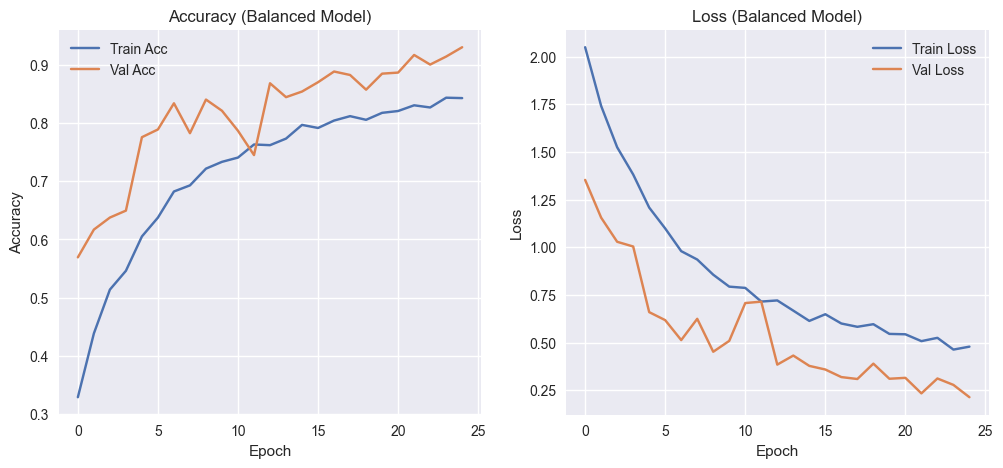

In [46]:
# Learning curve of the balanced model on accuracy and loss
plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history_balanced.history['accuracy'], label='Train Acc')
plt.plot(history_balanced.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy (Balanced Model)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history_balanced.history['loss'], label='Train Loss')
plt.plot(history_balanced.history['val_loss'], label='Val Loss')
plt.title('Loss (Balanced Model)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


- The balanced model shows strong validation performance, with validation accuracy surpassing training accuracy and validation loss decreasing steadily. This indicates improved generalization and reduced bias toward dominant classes after balancing the dataset

In [47]:
# comparison of metrices of the baseline model and balanced model
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix, classification_report

#Loading the saved models
model_unbalanced = load_model("best_model.keras")
model_balanced = load_model("best_balanced_model.keras")

In [48]:

#Evaluating both models on test data
unb_eval = model_unbalanced.evaluate(test_ds, verbose=0)
bal_eval = model_balanced.evaluate(test_ds, verbose=0)

print("Models Evaluation")
print(f"Unbalanced Model - Loss: {unb_eval[0]:.4f}, Accuracy: {unb_eval[1]:.4f}")
print(f"Balanced Model   - Loss: {bal_eval[0]:.4f}, Accuracy: {bal_eval[1]:.4f}")

Models Evaluation
Unbalanced Model - Loss: 0.2108, Accuracy: 0.9269
Balanced Model   - Loss: 0.2614, Accuracy: 0.9086


In [49]:
# Function to get predictions
def get_predictions(model, dataset):
    y_true, y_pred = [], []
    for images, labels in dataset:
        preds = model.predict(images)
        y_true.extend(labels.numpy())
        y_pred.extend(np.argmax(preds, axis=1))
    return np.array(y_true), np.array(y_pred)

y_true_unb, y_pred_unb = get_predictions(model_unbalanced, test_ds)
y_true_bal, y_pred_bal = get_predictions(model_balanced, test_ds)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 305ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

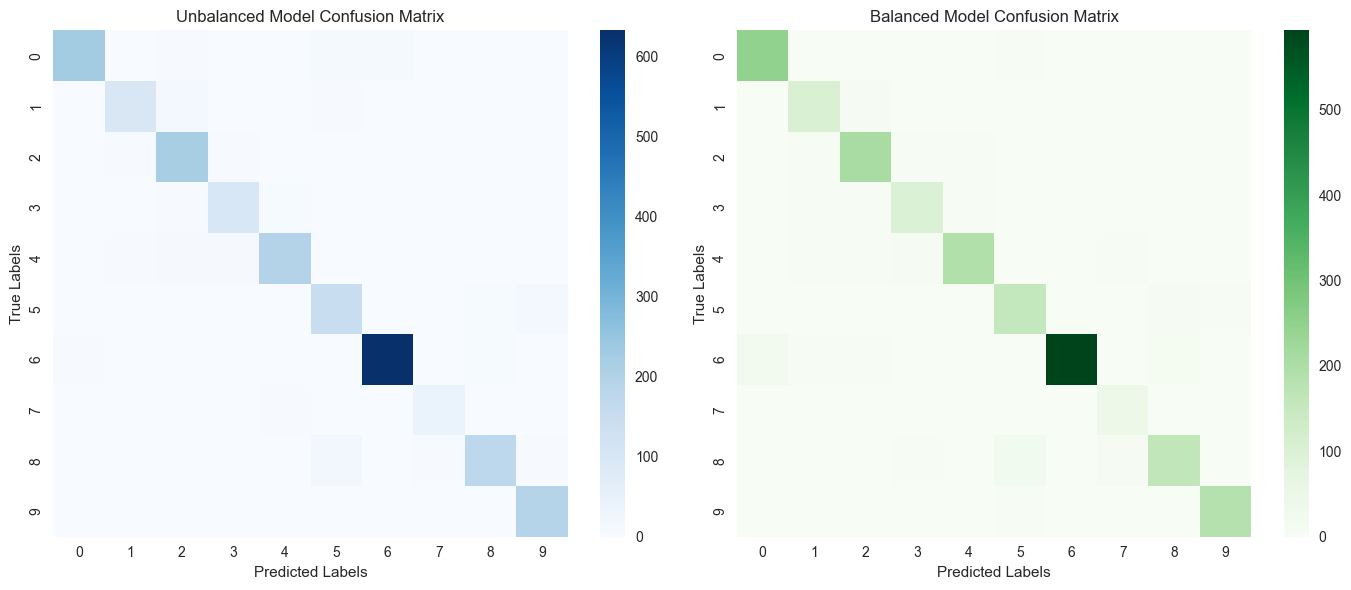


 Unbalanced Model Report
                                  precision    recall  f1-score   support

               Bacterial_spot227       0.97      0.89      0.93       256
                 Early_blight227       0.90      0.81      0.85       120
                  Late_blight227       0.88      0.95      0.91       230
                    Leaf_Mold227       0.89      0.87      0.88       115
           Septoria_leaf_spot227       0.94      0.91      0.92       214
                  Target_Spot227       0.82      0.88      0.85       170
Tomato_Yellow_Leaf_Curl_Virus227       0.98      0.98      0.98       644
          Tomato_mosaic_virus227       0.93      0.87      0.90        46
      Two-spotted_spider_mite227       0.91      0.87      0.89       202
                      healthy227       0.90      0.99      0.95       192

                        accuracy                           0.93      2189
                       macro avg       0.91      0.90      0.91      2189
          

In [50]:
# Confusion Matrix
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
sns.heatmap(confusion_matrix(y_true_unb, y_pred_unb), annot=False, cmap="Blues", ax=axes[0])
axes[0].set_title("Unbalanced Model Confusion Matrix")
axes[0].set_xlabel("Predicted Labels")
axes[0].set_ylabel("True Labels")

sns.heatmap(confusion_matrix(y_true_bal, y_pred_bal), annot=False, cmap="Greens", ax=axes[1])
axes[1].set_title("Balanced Model Confusion Matrix")
axes[1].set_xlabel("Predicted Labels")
axes[1].set_ylabel("True Labels")

plt.tight_layout()
plt.show()

#Classification Reports
print("\n Unbalanced Model Report")
print(classification_report(y_true_unb, y_pred_unb, target_names=class_names))

print("\n Balanced Model Report ")
print(classification_report(y_true_bal, y_pred_bal, target_names=class_names))


- The balanced model is more fair and generalizes better across all disease types, even though its overall accuracy is slightly lower. It’s better suited for real-world tomato disease detection, where missing rare diseases is more costly than a small drop in accuracy.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


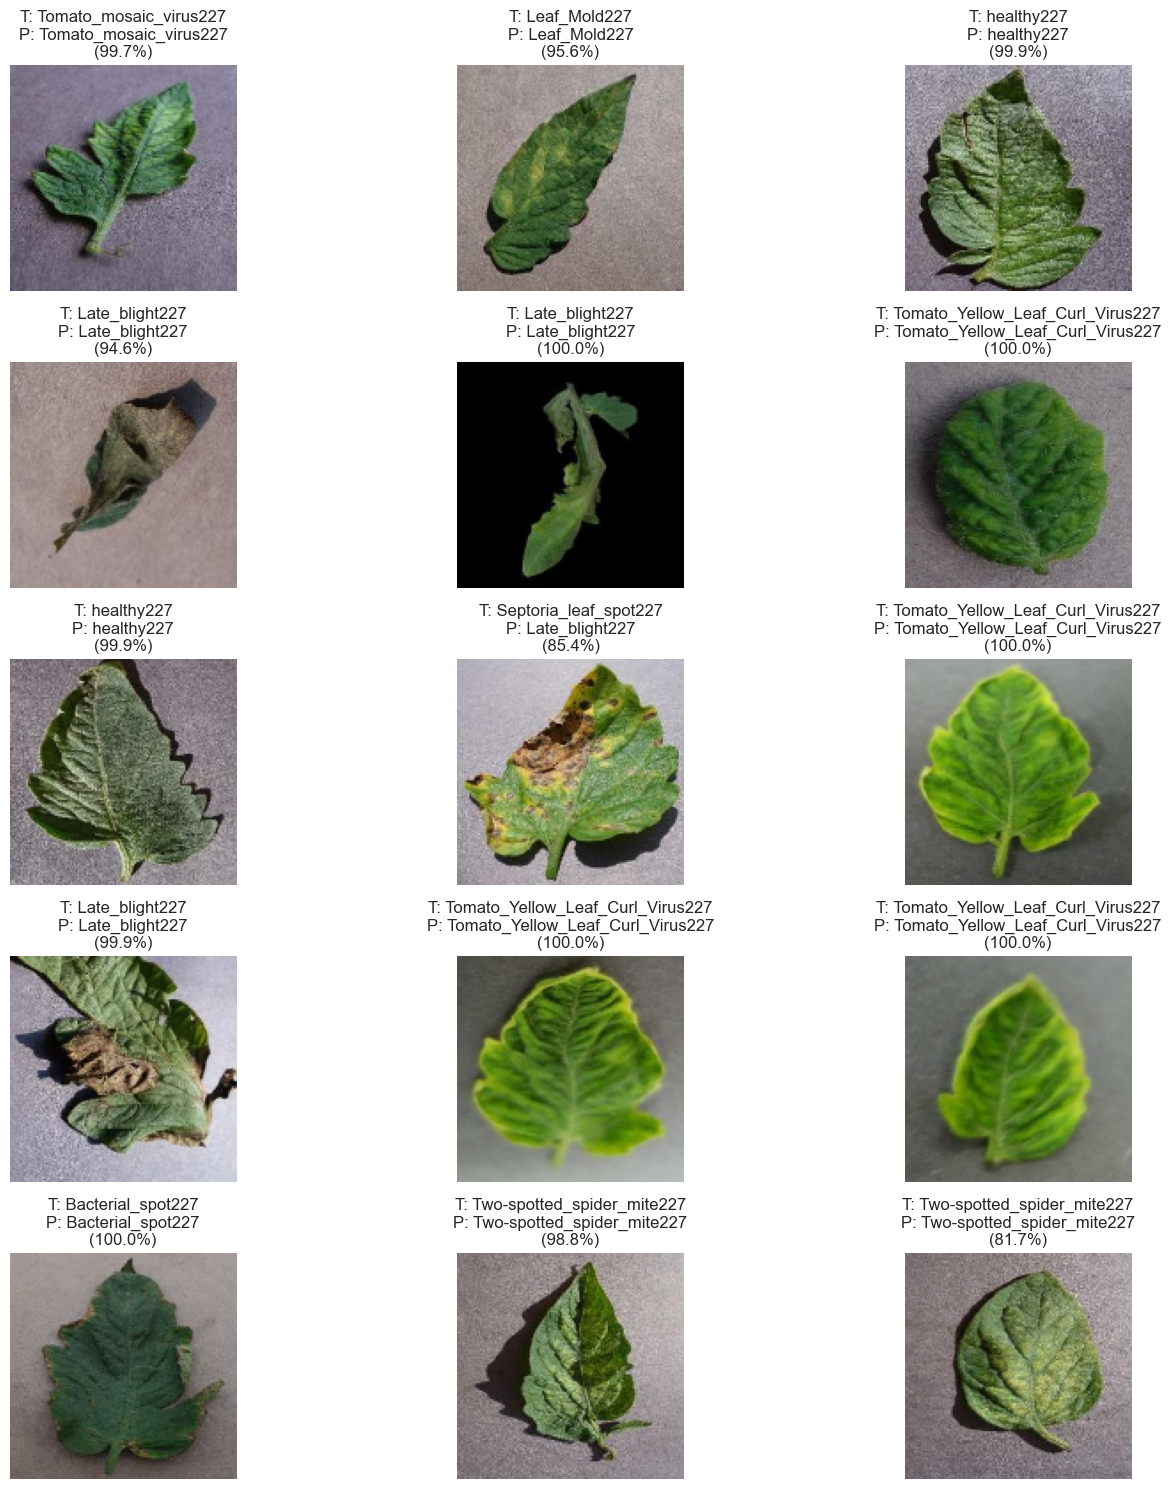

In [51]:
# visualizing predictions of the images
# Take all batches from test dataset and shuffle one of them manually
test_images = []
test_labels = []

# Collect one full batch (or more if you like)
for images, labels in test_ds.take(1):
    test_images = images.numpy()
    test_labels = labels.numpy()

# Shuffle indices
indices = np.arange(len(test_images))
np.random.shuffle(indices)

# Apply shuffle
test_images = test_images[indices]
test_labels = test_labels[indices]

# Predict
preds = model_balanced.predict(test_images)

# Visualize random predictions
plt.figure(figsize=(15, 15))
for i in range(15):  # Show 15 shuffled predictions
    true_label = class_names[test_labels[i]]
    pred_label = class_names[np.argmax(preds[i])]
    confidence = np.max(preds[i]) * 100

    plt.subplot(5, 3, i + 1)
    plt.imshow(test_images[i].astype("uint8"))
    plt.title(f"T: {true_label}\nP: {pred_label}\n({confidence:.1f}%)")
    plt.axis("off")

plt.tight_layout()
plt.show()


- The confidence percentage tells how sure the model was about its decision.
- High confidence but wrong shows overconfident misclassification.while ,Low confidence shows image may be confusing.

In [52]:
# Evaluate both models on the same test set
baseline_eval = model.evaluate(test_ds, verbose=0)
balanced_eval = model_balanced.evaluate(test_ds, verbose=0)

print("Baseline Model - Loss: {:.4f}, Accuracy: {:.4f}".format(baseline_eval[0], baseline_eval[1]))
print("Balanced Model - Loss: {:.4f}, Accuracy: {:.4f}".format(balanced_eval[0], balanced_eval[1]))


Baseline Model - Loss: 0.2108, Accuracy: 0.9269
Balanced Model - Loss: 0.2614, Accuracy: 0.9086


In [53]:
# Get true and predicted labels
y_true = np.concatenate([y for x, y in test_ds], axis=0)
y_pred_baseline = np.argmax(model.predict(test_ds), axis=1)
y_pred_balanced = np.argmax(model_balanced.predict(test_ds), axis=1)

# Reports
print("Baseline Model")
print(classification_report(y_true, y_pred_baseline, target_names=class_names))

print("\n Balanced Model")
print(classification_report(y_true, y_pred_balanced, target_names=class_names))


69/69 ━━━━━━━━━━━━━━━━━━━━ 5s 72ms/step
69/69 ━━━━━━━━━━━━━━━━━━━━ 5s 67ms/step
Baseline Model
                                  precision    recall  f1-score   support

               Bacterial_spot227       0.97      0.89      0.93       256
                 Early_blight227       0.90      0.81      0.85       120
                  Late_blight227       0.88      0.95      0.91       230
                    Leaf_Mold227       0.89      0.87      0.88       115
           Septoria_leaf_spot227       0.94      0.91      0.92       214
                  Target_Spot227       0.82      0.88      0.85       170
Tomato_Yellow_Leaf_Curl_Virus227       0.98      0.98      0.98       644
          Tomato_mosaic_virus227       0.93      0.87      0.90        46
      Two-spotted_spider_mite227       0.91      0.87      0.89       202
                      healthy227       0.90      0.99      0.95       192

                        accuracy                           0.93      2189
               

The class-balanced model reached 91% accuracy but improved recall for minority classes,Early_blight rose to 0.88, Bacterial_spot to 0.96,demonstrating better recognition of underrepresented classes. Overall, class weighting enhances minority class performance with minimal impact on overall accuracy.

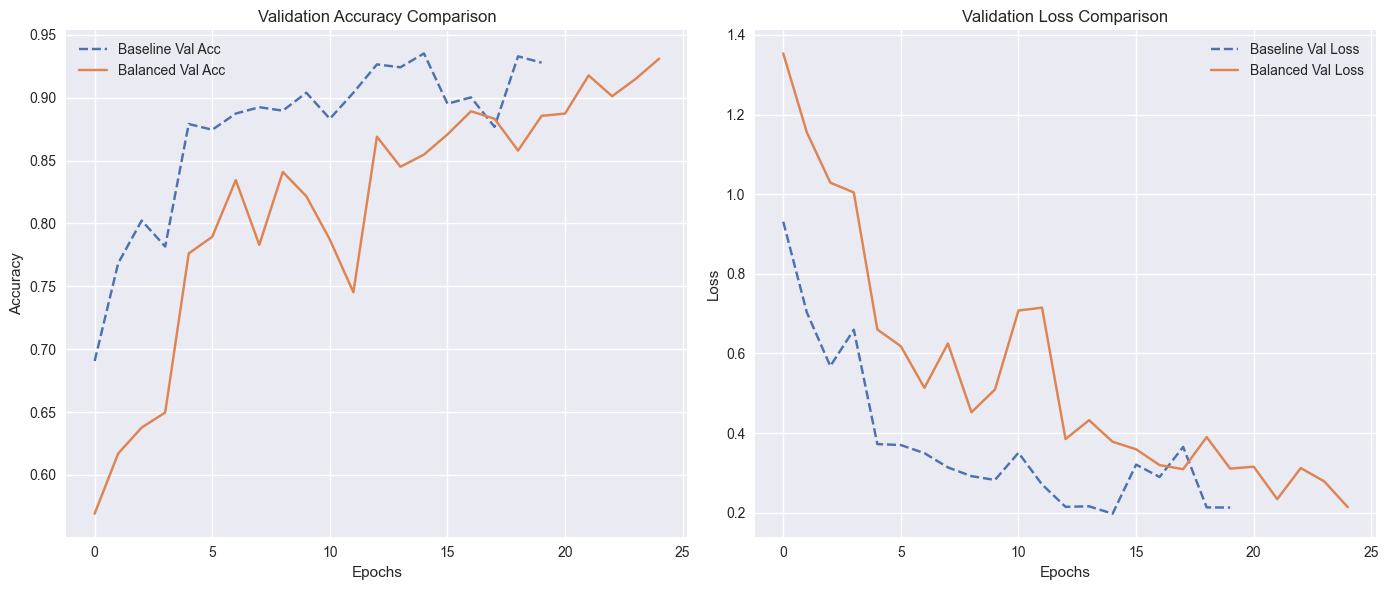

In [54]:
# comparison of baseline model and balanced model learning curve
plt.figure(figsize=(14, 6))

# Accuracy Comparison
plt.subplot(1, 2, 1)
plt.plot(history.history['val_accuracy'], label='Baseline Val Acc', linestyle='--')
plt.plot(history_balanced.history['val_accuracy'], label='Balanced Val Acc', linestyle='-')
plt.title('Validation Accuracy Comparison')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Loss Comparison
plt.subplot(1, 2, 2)
plt.plot(history.history['val_loss'], label='Baseline Val Loss', linestyle='--')
plt.plot(history_balanced.history['val_loss'], label='Balanced Val Loss', linestyle='-')
plt.title('Validation Loss Comparison')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


- The learning curves show that the baseline model achieved higher validation accuracy 0.90–0.93 and lower loss less than 0.3, indicating stronger generalization.
- The balanced model improved steadily, reaching about 0.91 accuracy by epoch 25, with smoother and more stable learning across minority classes, though with slightly lower overall accuracy.

- The unbalanced CNN achieved 93% test accuracy but underperformed on minority classes, with recall scores of 0.81 for Early_blight and 0.88 for Target_Spot. Applying class weighting improved minority class recognition—Early_blight rose to 0.88 and Bacterial_spot to 0.96—while maintaining overall accuracy.

- Next, class weighting will be combined with a lightweight transfer learning model, such as MobileNetV2, to further enhance both accuracy and balanced performance.

# 6.Transfer Learning with MobileNetV2

In [6]:
# Transfer Learning with MobileNetV2 (Frozen Base)
# Preprocess datasets for MobileNetV2
def apply_preprocess(images, labels):
    images = tf.image.resize(images, [224, 224])
    images = preprocess_input(images)#scale pixels to [-1, 1]
    return images, labels

AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.map(apply_preprocess, num_parallel_calls=AUTOTUNE)
val_ds = val_ds.map(apply_preprocess, num_parallel_calls=AUTOTUNE)
test_ds = test_ds.map(apply_preprocess, num_parallel_calls=AUTOTUNE)

In [7]:
#  Compute Class Weights
import numpy as np
from sklearn.utils import class_weight

y_train = np.concatenate([y for x, y in train_ds], axis=0)

class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)
class_weights = dict(enumerate(class_weights))

print("Computed class weights:")
for i, w in class_weights.items():
    print(f"{class_names[i]}: {w:.4f}")


Computed class weights:
Bacterial_spot227: 0.8537
Early_blight227: 1.8155
Late_blight227: 0.9511
Leaf_Mold227: 1.9075
Septoria_leaf_spot227: 1.0259
Target_Spot227: 1.2935
Tomato_Yellow_Leaf_Curl_Virus227: 0.3389
Tomato_mosaic_virus227: 4.8646
Two-spotted_spider_mite227: 1.0839
healthy227: 1.1424


In [8]:

# Optimize dataset performance
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [9]:
#  Build MobileNetV2 model (frozen base)
num_classes = len(class_names)

base_model = MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet'
)
base_model.trainable = False  # Freeze pretrained weights

inputs = layers.Input(shape=(224, 224, 3))
x = base_model(inputs, training=False)  # ensure BatchNorm behaves correctly
x = layers.GlobalAveragePooling2D()(x)
x = layers.BatchNormalization()(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.3)(x)
outputs = layers.Dense(num_classes, activation='softmax')(x)

model_mobilenet = models.Model(inputs, outputs, name="MobileNetV2_Transfer")

model_mobilenet.compile(
    optimizer=Adam(learning_rate=1e-5),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [10]:

model_mobilenet.summary()

Model: "MobileNetV2_Transfer"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 1280)           │         5,120 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       327,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,593,610 (9.89 MB)

 Trainable params: 333,066 (1.27 MB)

 Non-trainable params: 2,260,544 (8.62 MB)

In [11]:
#  Train and save best frozen-transfer model
checkpoint_tl = ModelCheckpoint(
    "best_mobilenet_transfer.keras",
    monitor='val_accuracy',
    save_best_only=True,
    mode='max',
    verbose=1
)

# Stop training early if validation loss doesn't improve for 'patience' epochs
early_stop_tl = EarlyStopping(
    monitor='val_loss',
    patience=8,
    restore_best_weights=True
)

# Reduce learning rate when validation loss plateaus
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5, # Reduce learning rate by factor of 0.5
    patience=8,
    verbose=1
)


In [13]:
# fit the model
history_mobilenet = model_mobilenet.fit(
    train_ds,
    validation_data=val_ds,
    epochs=25,
    class_weight=class_weights,
    callbacks=[checkpoint_tl, early_stop_tl, reduce_lr]# Callbacks for best model, early stopping, and LR reduction
)


Epoch 1/25
318/318 ━━━━━━━━━━━━━━━━━━━━ 0s 325ms/step - accuracy: 0.1121 - loss: 3.0625
Epoch 1: val_accuracy improved from None to 0.23126, saving model to best_mobilenet_transfer.keras
318/318 ━━━━━━━━━━━━━━━━━━━━ 142s 408ms/step - accuracy: 0.1456 - loss: 2.7985 - val_accuracy: 0.2313 - val_loss: 2.1045 - learning_rate: 1.0000e-05
Epoch 2/25
318/318 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step - accuracy: 0.2657 - loss: 2.1678
Epoch 2: val_accuracy improved from 0.23126 to 0.47632, saving model to best_mobilenet_transfer.keras
318/318 ━━━━━━━━━━━━━━━━━━━━ 156s 490ms/step - accuracy: 0.3159 - loss: 2.0210 - val_accuracy: 0.4763 - val_loss: 1.5410 - learning_rate: 1.0000e-05
Epoch 3/25
318/318 ━━━━━━━━━━━━━━━━━━━━ 0s 345ms/step - accuracy: 0.4489 - loss: 1.6936
Epoch 3: val_accuracy improved from 0.47632 to 0.61057, saving model to best_mobilenet_transfer.keras
318/318 ━━━━━━━━━━━━━━━━━━━━ 133s 418ms/step - accuracy: 0.4767 - loss: 1.6269 - val_accuracy: 0.6106 - val_loss: 1.2370 - learning_rat

In [14]:
#Evaluating the Frozen-Transfer Model
# Evaluate on the test dataset
test_loss_tl, test_acc_tl = model_mobilenet.evaluate(test_ds)
print(f"MobileNetV2 (Transfer) - Loss: {test_loss_tl:.4f}, Accuracy: {test_acc_tl:.4f}")


69/69 ━━━━━━━━━━━━━━━━━━━━ 23s 330ms/step - accuracy: 0.8611 - loss: 0.4221
MobileNetV2 (Transfer) - Loss: 0.4221, Accuracy: 0.8611


In [15]:
# Saving a copy of the frozen-transfer model for backup before fine-tuning,analysis and reusability.
model_mobilenet.save("copy_mobilenet_transfer_frozen.keras")

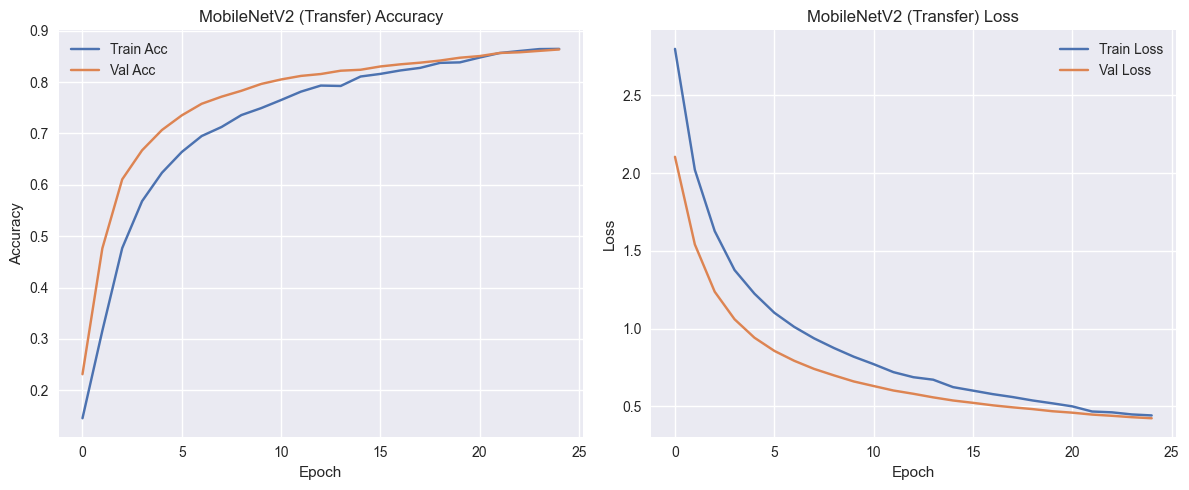

In [16]:
# Plot Training Accuracy and Loss
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history_mobilenet.history['accuracy'], label='Train Acc')
plt.plot(history_mobilenet.history['val_accuracy'], label='Val Acc')
plt.title('MobileNetV2 (Transfer) Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history_mobilenet.history['loss'], label='Train Loss')
plt.plot(history_mobilenet.history['val_loss'], label='Val Loss')
plt.title('MobileNetV2 (Transfer) Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


The MobileNetV2 model shows steady improvement, with both training and validation accuracy rising and loss consistently decreasing across epochs. The close alignment between training and validation curves indicates good generalization and minimal overfitting.

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 385ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 381ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 374ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 431ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 328ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 359ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 328ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 304ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 

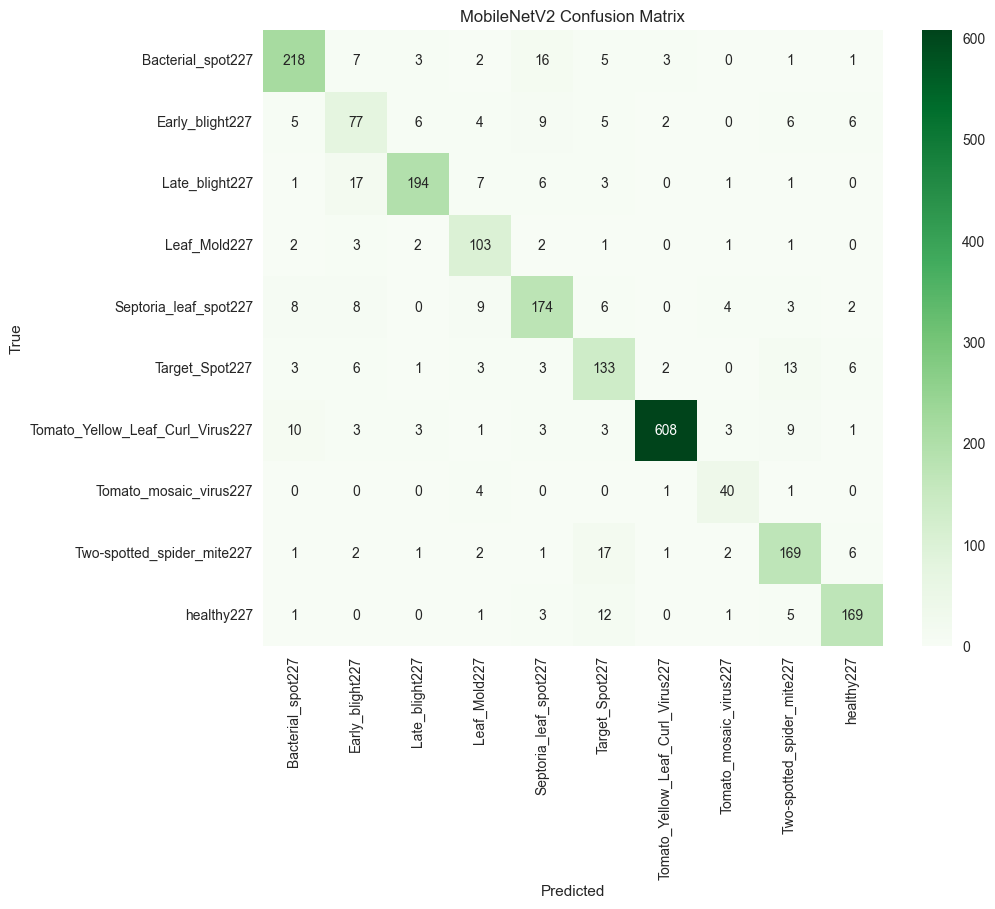

In [17]:
#Classification Report

y_true, y_pred = [], []

# Predict labels for the test dataset
for images, labels in test_ds:
    preds = np.argmax(model_mobilenet.predict(images), axis=1)
    y_true.extend(labels.numpy())
    y_pred.extend(preds)

# display classification report
print(classification_report(y_true, y_pred, target_names=class_names))

# Confusion Matrix
# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=class_names, yticklabels=class_names)
plt.title("MobileNetV2 Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


- Model Performance - The MobileNetV2 transfer model achieved 86% test accuracy with balanced precision and recall (macro F1 = 0.82). Smooth convergence and close train–validation curves indicate good generalization without overfitting.

- Class-Level Insights - Major classes like Tomato Yellow Leaf Curl Virus were classified with high confidence, while minority classes such as Early Blight showed lower recall. This indicates the model effectively leveraged pretrained ImageNet features but could benefit from more adaptation for underrepresented classes

- Recommendation & Next Step - Unfreeze and fine-tune the upper layers of MobileNetV2 using a lower learning rate and class weighting. This will improve feature learning, enhance distinction between similar disease categories, and boost both overall accuracy and balanced class performance.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step


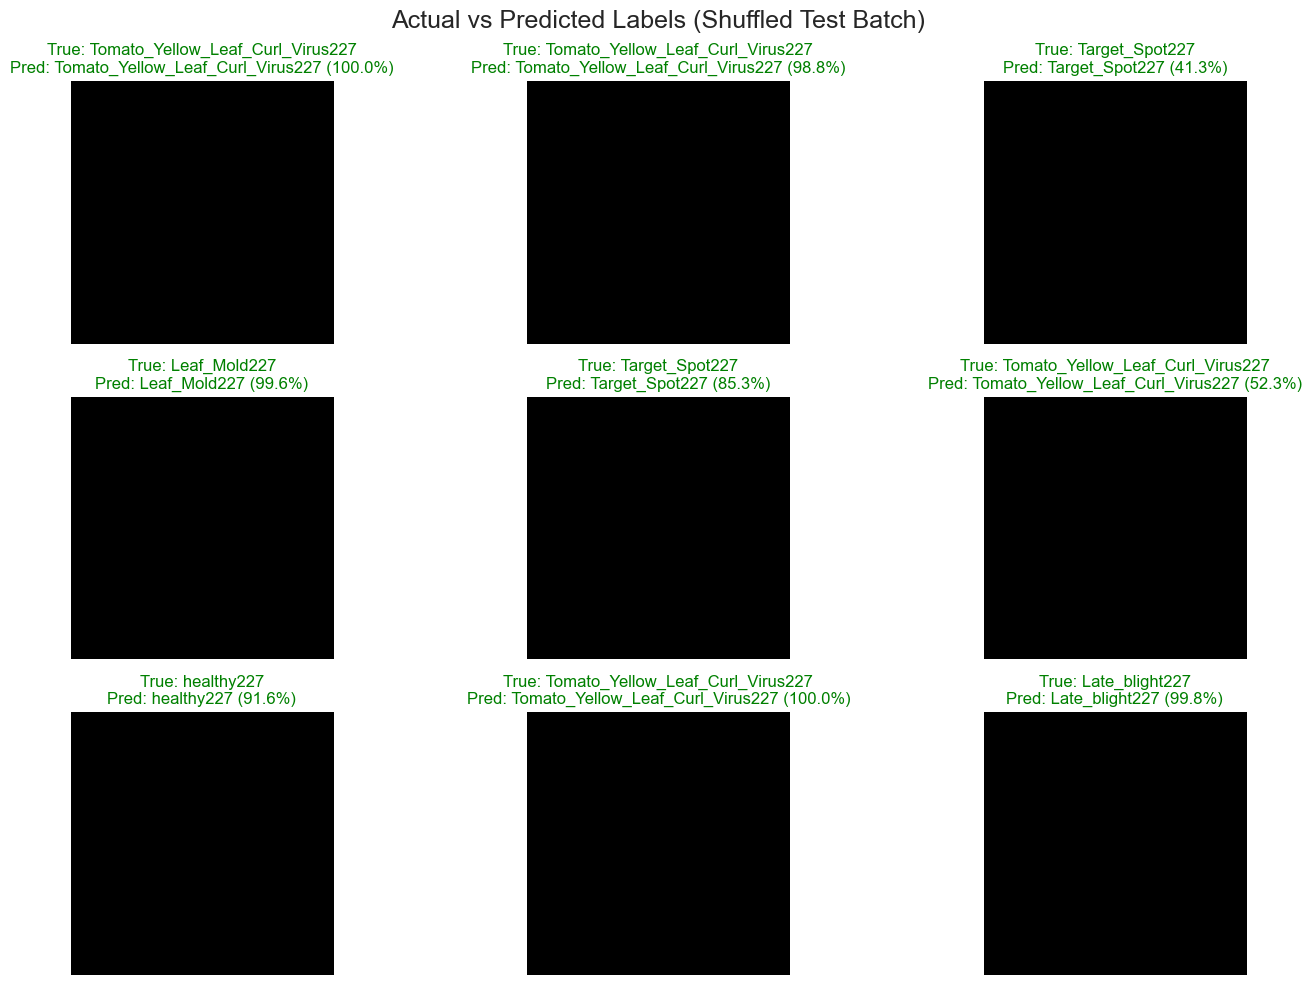

In [18]:
# Visualizing Test Predictions (Correct in Green, Wrong in Red)

# Shuffle test dataset to show random samples
shuffled_test_ds = test_ds.shuffle(buffer_size=1000, seed=42)

for images, labels in shuffled_test_ds.take(1):  # Take one batch
    batch_predictions = model_mobilenet.predict(images)  # Predict batch
    plt.figure(figsize=(15, 10))
    
    # Display first 9 images
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        img = images[i].numpy().astype("uint8")
        true_label = class_names[labels[i].numpy()]
        pred_label = class_names[np.argmax(batch_predictions[i])]
        confidence = np.max(batch_predictions[i]) * 100

        plt.imshow(img)
        
        # Color title: green if correct, red if wrong
        color = "green" if pred_label == true_label else "red"
        plt.title(f"True: {true_label}\nPred: {pred_label} ({confidence:.1f}%)", color=color)
        plt.axis("off")

    plt.suptitle("Actual vs Predicted Labels (Shuffled Test Batch)", fontsize=18)
    plt.tight_layout()
    plt.show()


- The model accurately identifies most tomato leaf diseases with high confidence, especially Tomato_Yellow_Leaf_Curl_Virus and Late_Blight, while Target_Spot shows lower confidence and variability in predictions.

- Next Step 

Unfreezing  and fine-tuning the upper layers of MobileNetV2 using a lower learning rate and class weighting. To improve feature learning, enhance distinction between similar disease categories, and boost both overall accuracy and balanced class performance.

# 7.Fine-Tuning (unfreeze top layers)

In [19]:
# Fine-tune the pretrained MobileNetV2
from tensorflow.keras.models import load_model
# Load best frozen model
model_mobilenet = load_model("best_mobilenet_transfer.keras")


In [20]:
# Access base model safely
base_model = model_mobilenet.layers[1] if isinstance(model_mobilenet.layers[0], layers.InputLayer) else model_mobilenet.layers[0]
base_model.trainable = True

# 2. Unfreeze top 30 layers (fine-tune)
num_unfreeze = 30
for layer in base_model.layers[:-num_unfreeze]:
    layer.trainable = False
for layer in base_model.layers[-num_unfreeze:]:
    layer.trainable = True

print(f"Fine-tuning last {num_unfreeze} layers out of {len(base_model.layers)}")


Fine-tuning last 30 layers out of 154


In [22]:

# Recompile with lower LR
model_mobilenet.compile(
    optimizer=Adam(learning_rate=1e-5),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# 4. Fine-tune and save best model
checkpoint_ft = ModelCheckpoint(
    "best_mobilenet_finetuned.keras",
    monitor='val_accuracy',
    save_best_only=True,
    mode='max',
    verbose=1
)

early_stop_ft = EarlyStopping(
    monitor='val_loss',
    patience=4,
    restore_best_weights=True
)

reduce_lr_ft = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, verbose=1)

history_finetune = model_mobilenet.fit(
    train_ds,
    validation_data=val_ds,
    epochs=30,
    class_weight=class_weights,
    callbacks=[checkpoint_ft, early_stop_ft, reduce_lr_ft]
)



Epoch 1/30
318/318 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step - accuracy: 0.7388 - loss: 0.8496
Epoch 1: val_accuracy improved from None to 0.72046, saving model to best_mobilenet_finetuned.keras
318/318 ━━━━━━━━━━━━━━━━━━━━ 177s 538ms/step - accuracy: 0.7614 - loss: 0.7592 - val_accuracy: 0.7205 - val_loss: 0.9633 - learning_rate: 1.0000e-05
Epoch 2/30
318/318 ━━━━━━━━━━━━━━━━━━━━ 0s 484ms/step - accuracy: 0.8338 - loss: 0.5102
Epoch 2: val_accuracy improved from 0.72046 to 0.78897, saving model to best_mobilenet_finetuned.keras
318/318 ━━━━━━━━━━━━━━━━━━━━ 183s 576ms/step - accuracy: 0.8440 - loss: 0.4789 - val_accuracy: 0.7890 - val_loss: 0.7004 - learning_rate: 1.0000e-05
Epoch 3/30
318/318 ━━━━━━━━━━━━━━━━━━━━ 0s 495ms/step - accuracy: 0.8863 - loss: 0.3509
Epoch 3: val_accuracy improved from 0.78897 to 0.84460, saving model to best_mobilenet_finetuned.keras
318/318 ━━━━━━━━━━━━━━━━━━━━ 188s 590ms/step - accuracy: 0.8894 - loss: 0.3447 - val_accuracy: 0.8446 - val_loss: 0.4966 - learning_

In [23]:
#Evaluating the fine-tuned model
test_loss_ft, test_acc_ft = model_mobilenet.evaluate(test_ds)
print(f"Fine-tuned MobileNetV2 - Loss: {test_loss_ft:.4f}, Accuracy: {test_acc_ft:.4f}")

69/69 ━━━━━━━━━━━━━━━━━━━━ 23s 333ms/step - accuracy: 0.9484 - loss: 0.1672
Fine-tuned MobileNetV2 - Loss: 0.1672, Accuracy: 0.9484


- Training progress: The model started with 74% accuracy on epoch 1 and rapidly improved by the later epochs.

- Validation improvement: Validation accuracy steadily increased from 72%  95%, showing that fine-tuning the top layers significantly boosted performance.

- Learning rate adjustment: ReduceLROnPlateau reduced the LR from 1e-5 to 5e-6 toward the end, helping stabilize convergence.

- Generalization: The small gap between training and validation accuracy and smooth decline in validation loss indicate strong generalization with minimal overfitting.

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 306ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 334ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 321ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 309ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 305ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 326ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 323ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 

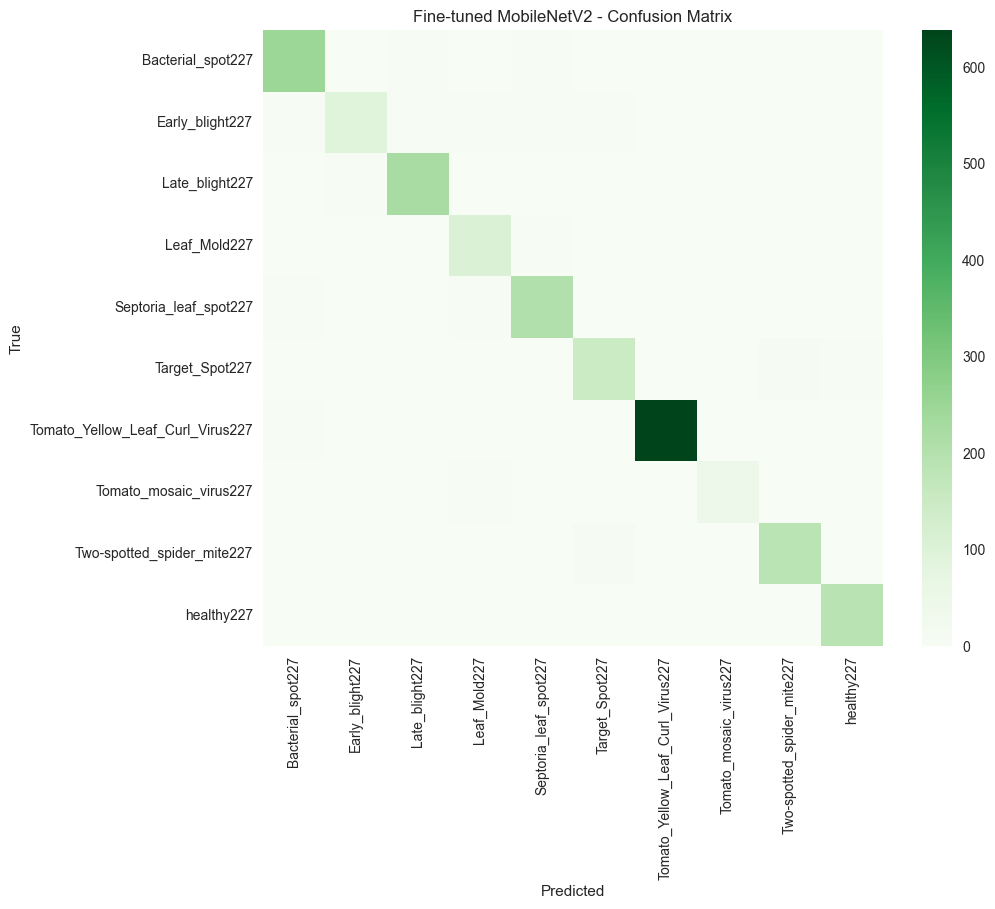

In [24]:
# Classification report and confusion matrix
y_true, y_pred = [], []
for images, labels in test_ds:
    preds = model_mobilenet.predict(images)
    y_true.extend(labels.numpy())
    y_pred.extend(np.argmax(preds, axis=1))

y_true = np.array(y_true)
y_pred = np.array(y_pred)

print("\n Fine-tuned MobileNetV2 Classification Report ")
print(classification_report(y_true, y_pred, target_names=class_names))

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=False, cmap='Greens', xticklabels=class_names, yticklabels=class_names)
plt.title("Fine-tuned MobileNetV2 - Confusion Matrix")
plt.xlabel("Predicted"); plt.ylabel("True")
plt.show()



- Overall Performance: The fine-tuned model achieved 95% test accuracy with a macro F1-score of 0.93 and a weighted F1-score of 0.95, showing strong improvements over the frozen model.
- Class-Level Insights: Major classes like Tomato Yellow Leaf Curl Virus (F1 0.99) and healthy leaves (F1 0.96) achieved near-perfect performance. Minority classes such as Early Blight (F1 0.84) and Target Spot (F1 0.88) improved significantly, though slightly lower than majority classes.
- Conclusion: Fine-tuning the top layers boosted both overall accuracy and minority class performance, demonstrating better feature adaptation for underrepresented disease categories.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 316ms/step


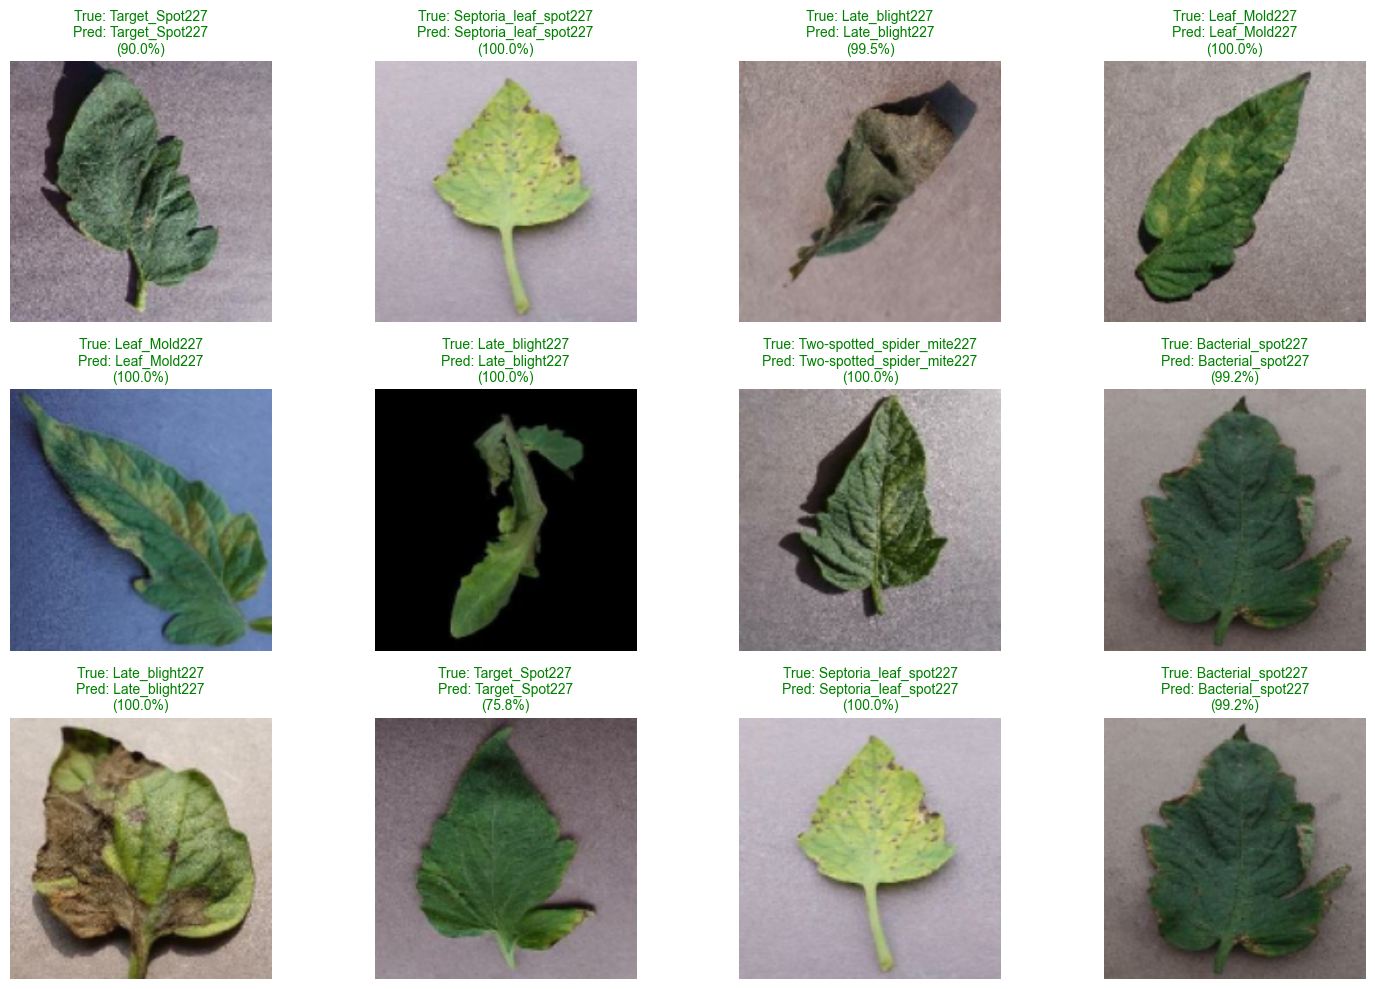

In [25]:
# displaying the true vs predicted
import matplotlib.pyplot as plt
import numpy as np
import random
import tensorflow as tf

#random seed for reproducibility
random.seed(42)

# Get one batch from test dataset
images, labels = next(iter(test_ds))
preds = model_mobilenet.predict(images)
pred_classes = np.argmax(preds, axis=1)
pred_confidences = np.max(preds, axis=1) * 100  # confidence in percentage

plt.figure(figsize=(15, 10))

for i in range(12):
    idx = random.randint(0, len(images) - 1)
    img = images[idx].numpy()
    
    # De-normalize for display
    if img.min() < 0.0:
        img = ((img + 1) * 127.5).astype("uint8")
    else:
        img = np.clip(img * 255, 0, 255).astype("uint8")

    true_label = class_names[labels[idx]]
    pred_label = class_names[pred_classes[idx]]
    confidence = pred_confidences[idx]

    plt.subplot(3, 4, i + 1)
    plt.imshow(img)
    plt.title(
        f"True: {true_label}\nPred: {pred_label}\n({confidence:.1f}%)",
        color=("green" if labels[idx] == pred_classes[idx] else "red"),
        fontsize=10
    )
    plt.axis("off")

plt.tight_layout()
plt.show()


The model predicts most tomato diseases with high confidence and accuracy, with Target_Spot showing slightly lower confidence.

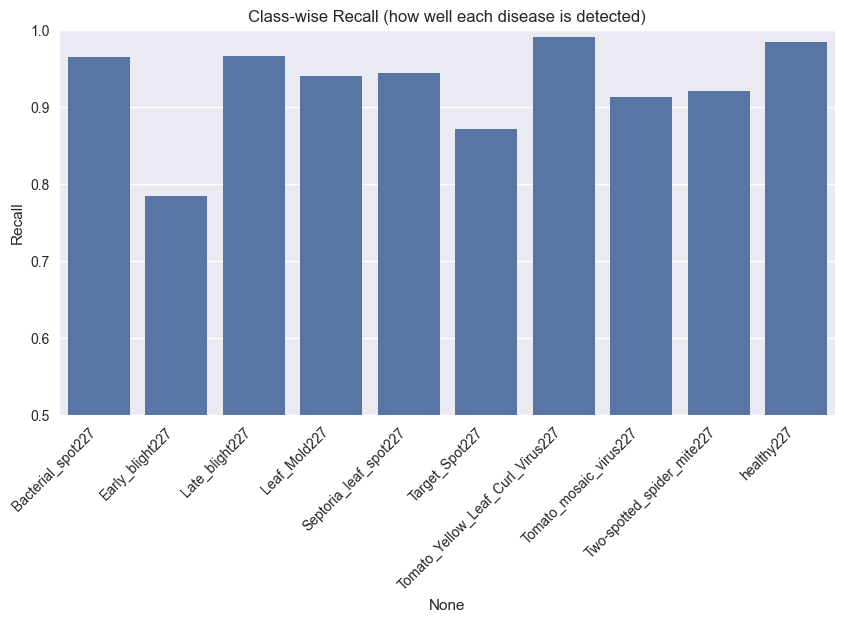

In [26]:
# class recall on the diseases
report = classification_report(y_true, y_pred, target_names=class_names, output_dict=True)
df = pd.DataFrame(report).transpose().iloc[:-3]  # exclude avg rows

plt.figure(figsize=(10,5))
sns.barplot(x=df.index, y=df["recall"])
plt.xticks(rotation=45, ha='right')
plt.title("Class-wise Recall (how well each disease is detected)")
plt.ylabel("Recall")
plt.ylim(0.5, 1.0)
plt.show()


- The model shows high recall across most tomato diseases, though it struggles slightly with Early_Blight and Target_Spot, likely due to limited data

C:\Users\Celine\AppData\Local\Temp\ipykernel_4920\685458278.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df.index, y=df[metric], palette="viridis")
C:\Users\Celine\AppData\Local\Temp\ipykernel_4920\685458278.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df.index, y=df[metric], palette="viridis")
C:\Users\Celine\AppData\Local\Temp\ipykernel_4920\685458278.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df.index, y=df[metric], palette="viridis")


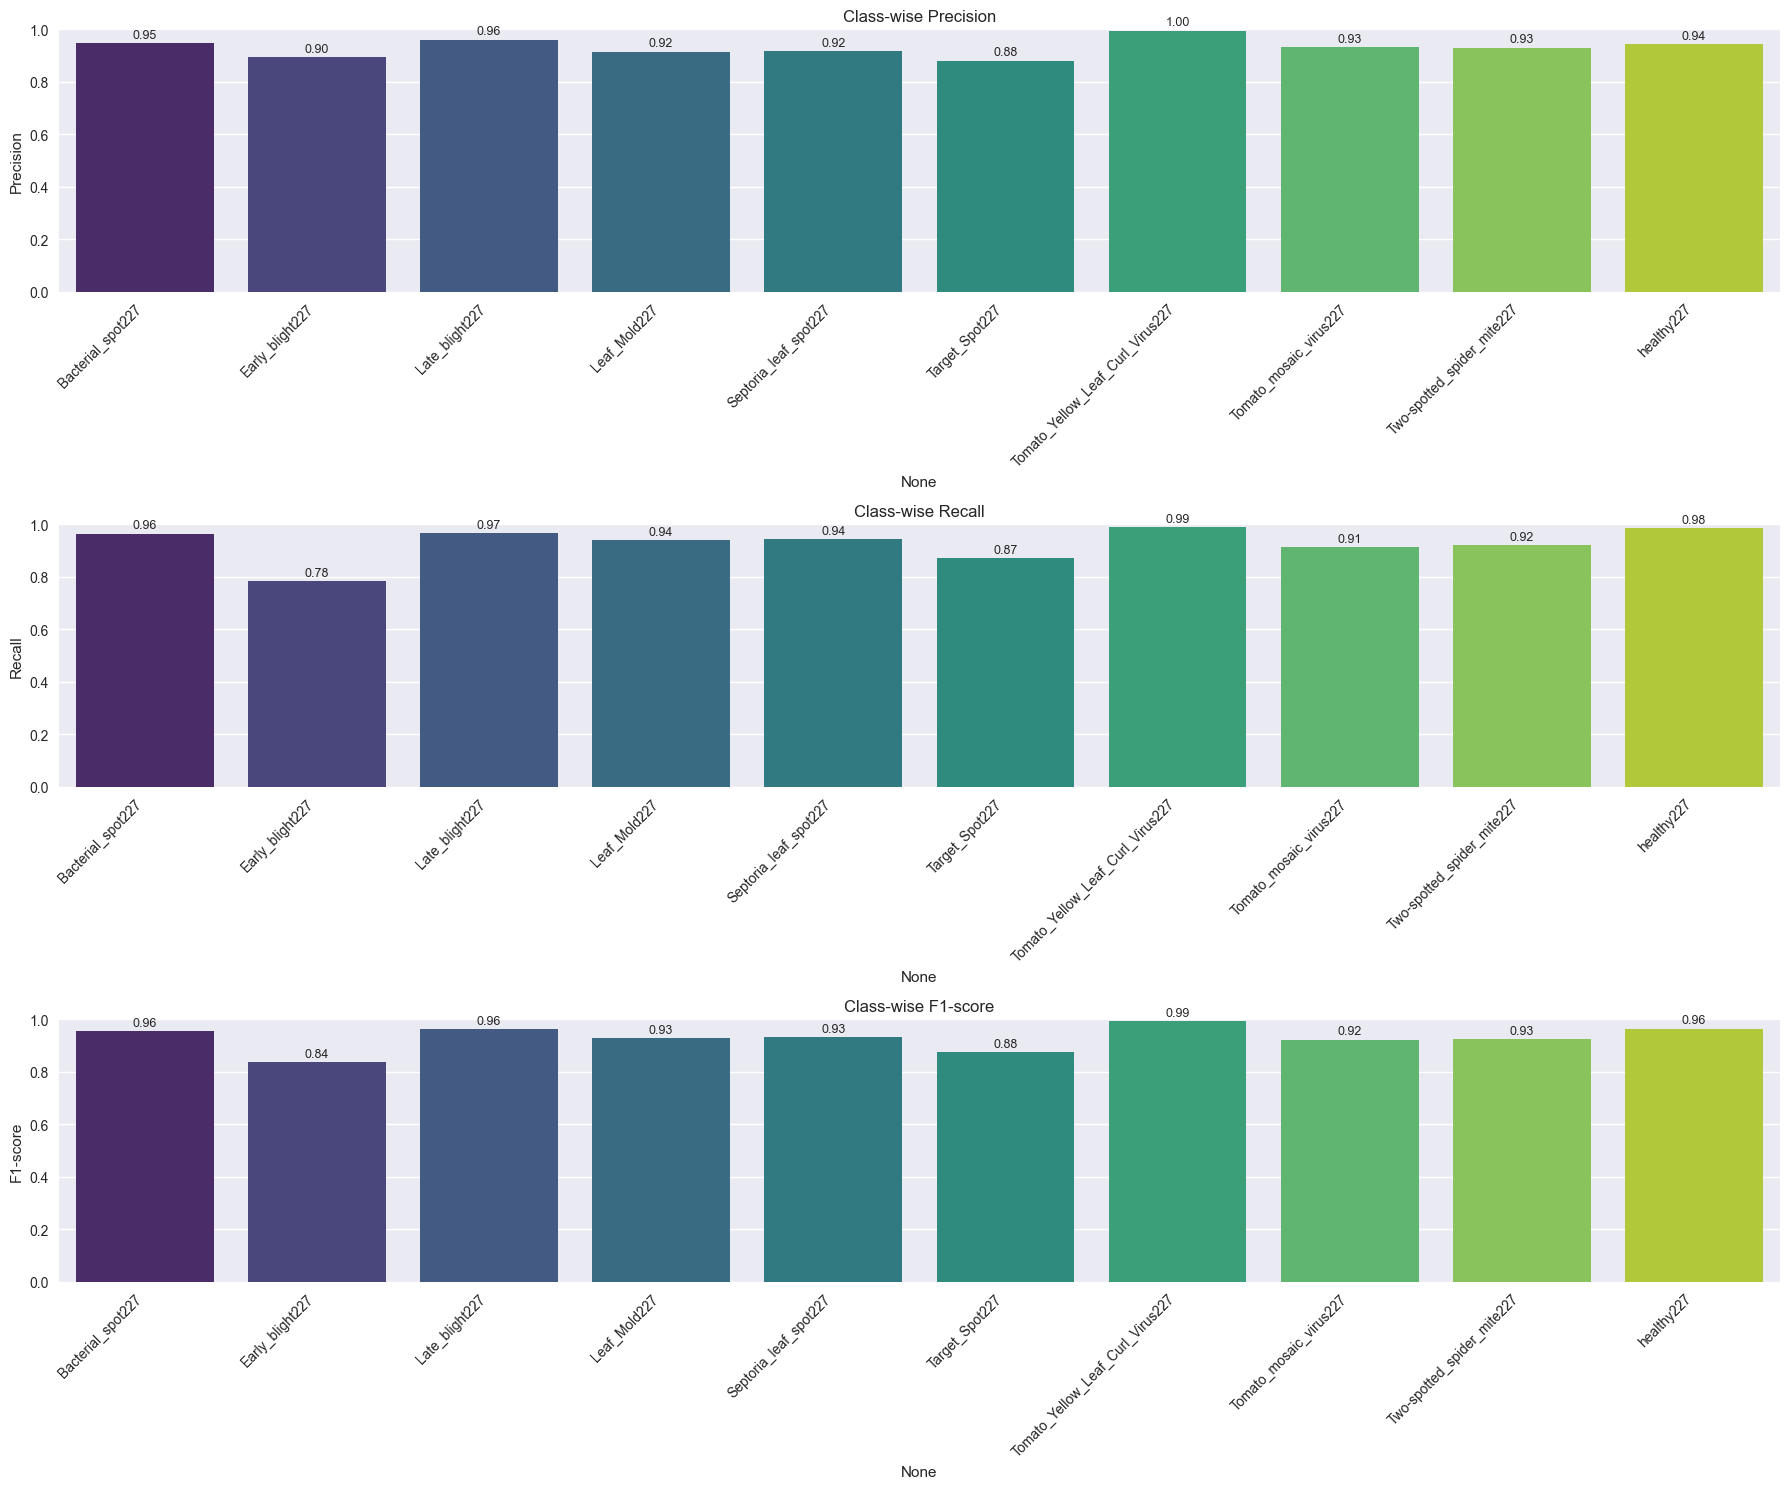

In [27]:
# Generate classification report as dictionary
report = classification_report(y_true, y_pred, target_names=class_names, output_dict=True)
df = pd.DataFrame(report).transpose().iloc[:-3]  # exclude avg rows

# Metrics to visualize
metrics = ["precision", "recall", "f1-score"]
plt.figure(figsize=(18, 5 * len(metrics)))

for i, metric in enumerate(metrics, 1):
    plt.subplot(len(metrics), 1, i)
    sns.barplot(x=df.index, y=df[metric], palette="viridis")
    plt.xticks(rotation=45, ha='right')
    plt.ylim(0, 1.0)
    plt.title(f"Class-wise {metric.capitalize()}")
    plt.ylabel(metric.capitalize())
    for j, val in enumerate(df[metric]):
        plt.text(j, val + 0.02, f"{val:.2f}", ha='center', fontsize=9)

plt.tight_layout()
plt.show()


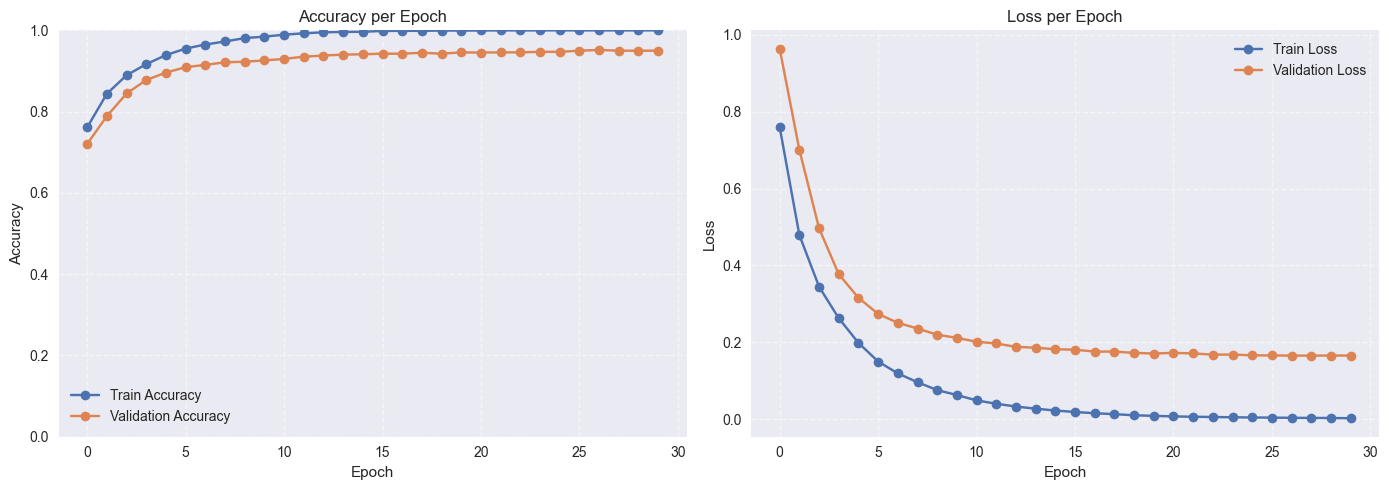

In [28]:
# Combined Accuracy & Loss plot
plt.figure(figsize=(14,5))

#Accuracy subplot
plt.subplot(1, 2, 1)
plt.plot(history_finetune.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history_finetune.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim(0, 1.0)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()

#Loss subplot
plt.subplot(1, 2, 2)
plt.plot(history_finetune.history['loss'], label='Train Loss', marker='o')
plt.plot(history_finetune.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()

plt.tight_layout()
plt.show()


The learning curves show steady improvement and convergence.
Training and validation accuracy rise smoothly, stabilizing around 95%, while loss decreases consistently for both sets.
The close gap between training and validation curves indicates strong generalization and minimal overfitting, confirming that the fine-tuned MobileNet learned effectively and performs reliably on unseen  data.

# 7.Models Evaluation

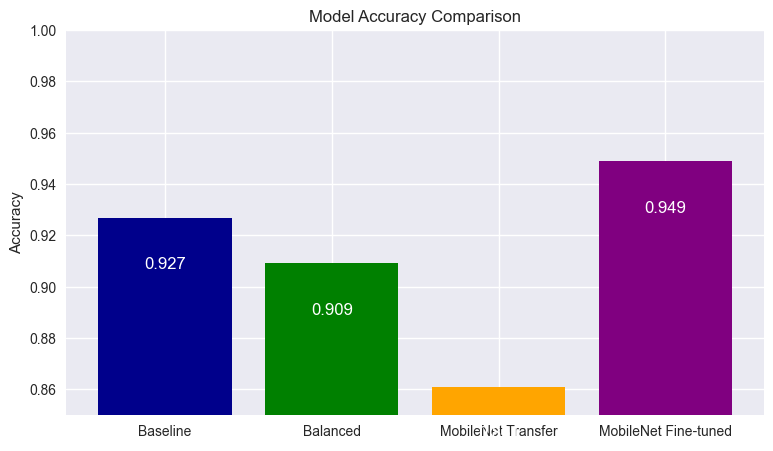

In [21]:
# 7. Compare all model accuracies
baseline_acc = 0.9269
balanced_acc = 0.909
mobilenet_transfer_acc = 0.861
mobilenet_finetuned_acc = 0.949

model_names = ["Baseline", "Balanced", "MobileNet Transfer", "MobileNet Fine-tuned"]
accuracies = [baseline_acc, balanced_acc, mobilenet_transfer_acc, mobilenet_finetuned_acc]

plt.figure(figsize=(9,5))
bars = plt.bar(model_names, accuracies, color=['darkblue', 'green', 'orange', 'purple'])
plt.ylim(0.85, 1.0)
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")

for bar, acc in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() - 0.02, f"{acc:.3f}", ha='center', color='white', fontsize=12)

plt.show()

- The fine-tuned MobileNet model achieved the highest accuracy at 0.949, outperforming all other models.

In [10]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import seaborn as sns

# Define preprocessing functions per model 
def preprocess_mobilenet(images, labels):
    images = tf.image.resize(images, [224, 224])
    images = tf.keras.applications.mobilenet_v2.preprocess_input(images)
    return images, labels

def preprocess_baseline(images, labels):
    images = tf.image.resize(images, [128, 128])  # adjust to your baseline model input
    return images, labels

# Load models 
models_dict = {
    "Baseline": load_model("best_model.keras"),
    "Balanced": load_model("best_balanced_model.keras"),
    "MobileNet Transfer": load_model("best_mobilenet_transfer.keras"),
    "MobileNet Fine-tuned": load_model("best_mobilenet_finetuned.keras")
}

#  Evaluate each model
eval_batch_size = 32
evaluation_results = {}

for name, model in models_dict.items():
    print(f"Evaluating {name} ...")
    
    # Choose correct preprocessing based on model type
    if "MobileNet" in name:
        ds = test_ds.unbatch().map(preprocess_mobilenet)
    else:
        ds = test_ds.unbatch().map(preprocess_baseline)
    
    ds = ds.batch(eval_batch_size).prefetch(tf.data.AUTOTUNE)
    
    y_true, y_pred = [], []
    for batch_images, batch_labels in ds:
        preds = model.predict(batch_images)
        y_pred.extend(np.argmax(preds, axis=1))
        y_true.extend(batch_labels.numpy())
    
    y_true_arr = np.array(y_true)
    y_pred_arr = np.array(y_pred)
    
    acc = accuracy_score(y_true_arr, y_pred_arr)
    f1 = f1_score(y_true_arr, y_pred_arr, average='weighted')
    
    evaluation_results[name] = {
        "accuracy": acc,
        "f1_score": f1,
        "y_true": y_true_arr,
        "y_pred": y_pred_arr
    }


Evaluating Baseline ...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━


Best Model: MobileNet Fine-tuned with Accuracy = 0.9493


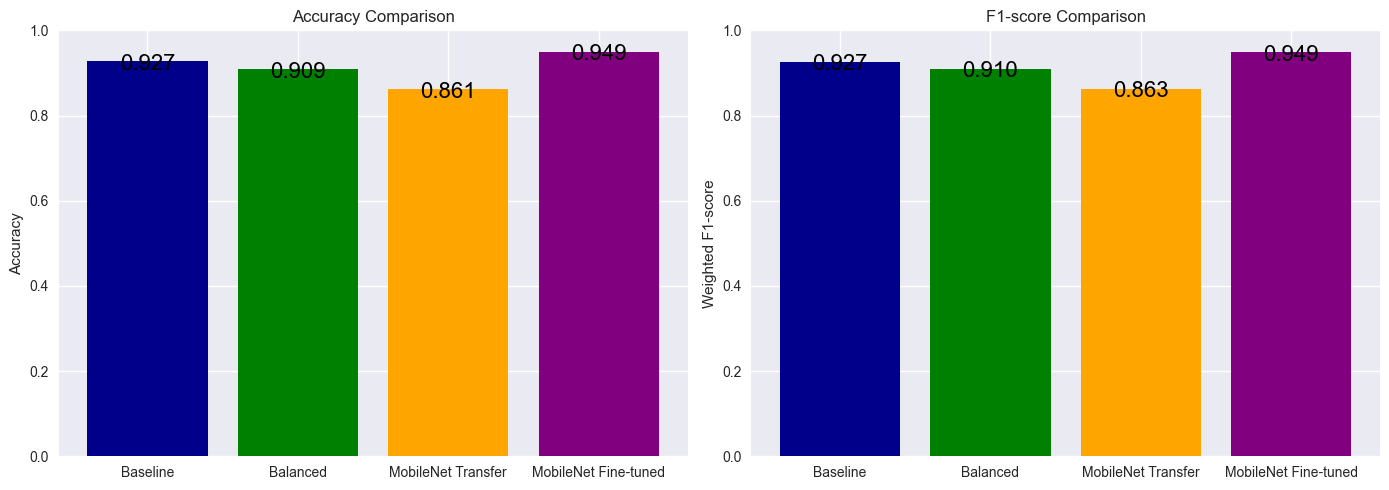

In [14]:

#  Identify best model
best_model_name = max(evaluation_results, key=lambda k: evaluation_results[k]['accuracy'])
print(f"\nBest Model: {best_model_name} with Accuracy = {evaluation_results[best_model_name]['accuracy']:.4f}")

# Accuracy & F1-score plots 
model_names = list(evaluation_results.keys())
accuracies = [evaluation_results[m]['accuracy'] for m in model_names]
f1_scores = [evaluation_results[m]['f1_score'] for m in model_names]

plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
bars_acc = plt.bar(model_names, accuracies, color=['darkblue', 'green', 'orange', 'purple'])
plt.ylim(0.0,1.0)
plt.ylabel("Accuracy")
plt.title("Accuracy Comparison")
for bar, acc in zip(bars_acc, accuracies):
    plt.text(bar.get_x()+bar.get_width()/2, bar.get_height()-0.02, f"{acc:.3f}",
             ha='center', color='black', fontsize=16)

plt.subplot(1,2,2)
bars_f1 = plt.bar(model_names, f1_scores, color=['darkblue', 'green', 'orange', 'purple'])
plt.ylim(0.0,1.0)
plt.ylabel("Weighted F1-score")
plt.title("F1-score Comparison")
for bar, f1_val in zip(bars_f1, f1_scores):
    plt.text(bar.get_x()+bar.get_width()/2, bar.get_height()-0.02, f"{f1_val:.3f}",
             ha='center', color='black', fontsize=16)

plt.tight_layout()
plt.show()


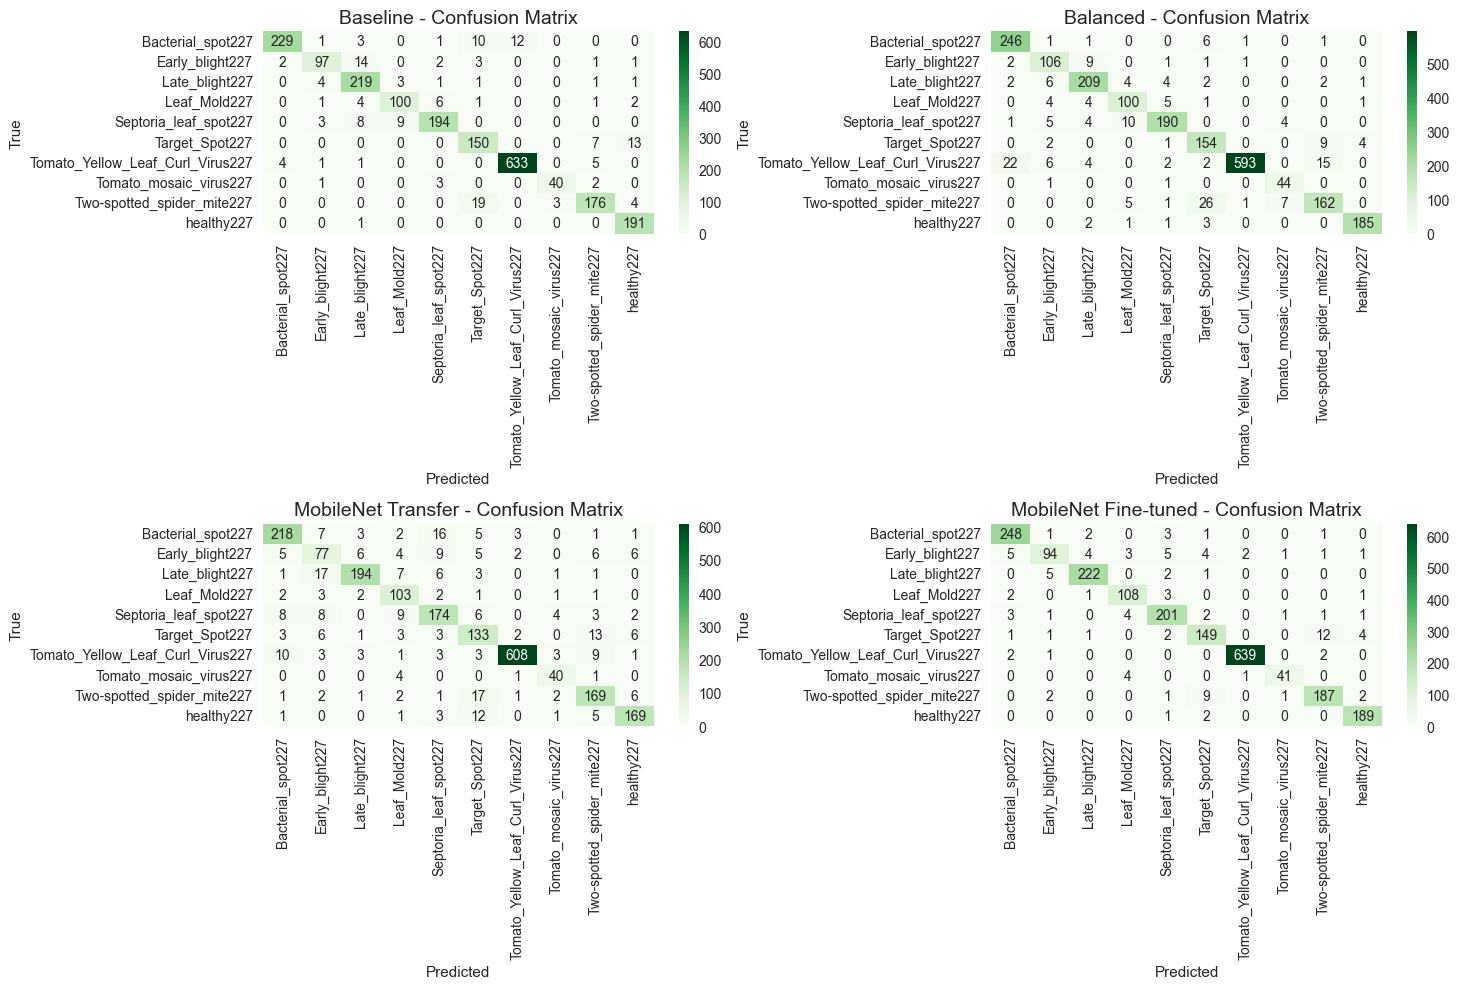

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

#  Confusion matrices in 2x2 grid 
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()  # flatten 2x2 grid to 1D for easy iteration

for idx, name in enumerate(model_names):
    cm = confusion_matrix(evaluation_results[name]["y_true"], evaluation_results[name]["y_pred"])
    sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', 
                xticklabels=class_names, yticklabels=class_names,
                ax=axes[idx])
    axes[idx].set_title(f"{name} - Confusion Matrix", fontsize=14)
    axes[idx].set_xlabel("Predicted")
    axes[idx].set_ylabel("True")

plt.tight_layout()
plt.show()


- The MobileNet Fine-tuned model shows the most accurate and consistent predictions, with higher diagonal values / correct classifications and minimal off-diagonal errors compared to the other models. This confirms its strong learning and generalization ability.

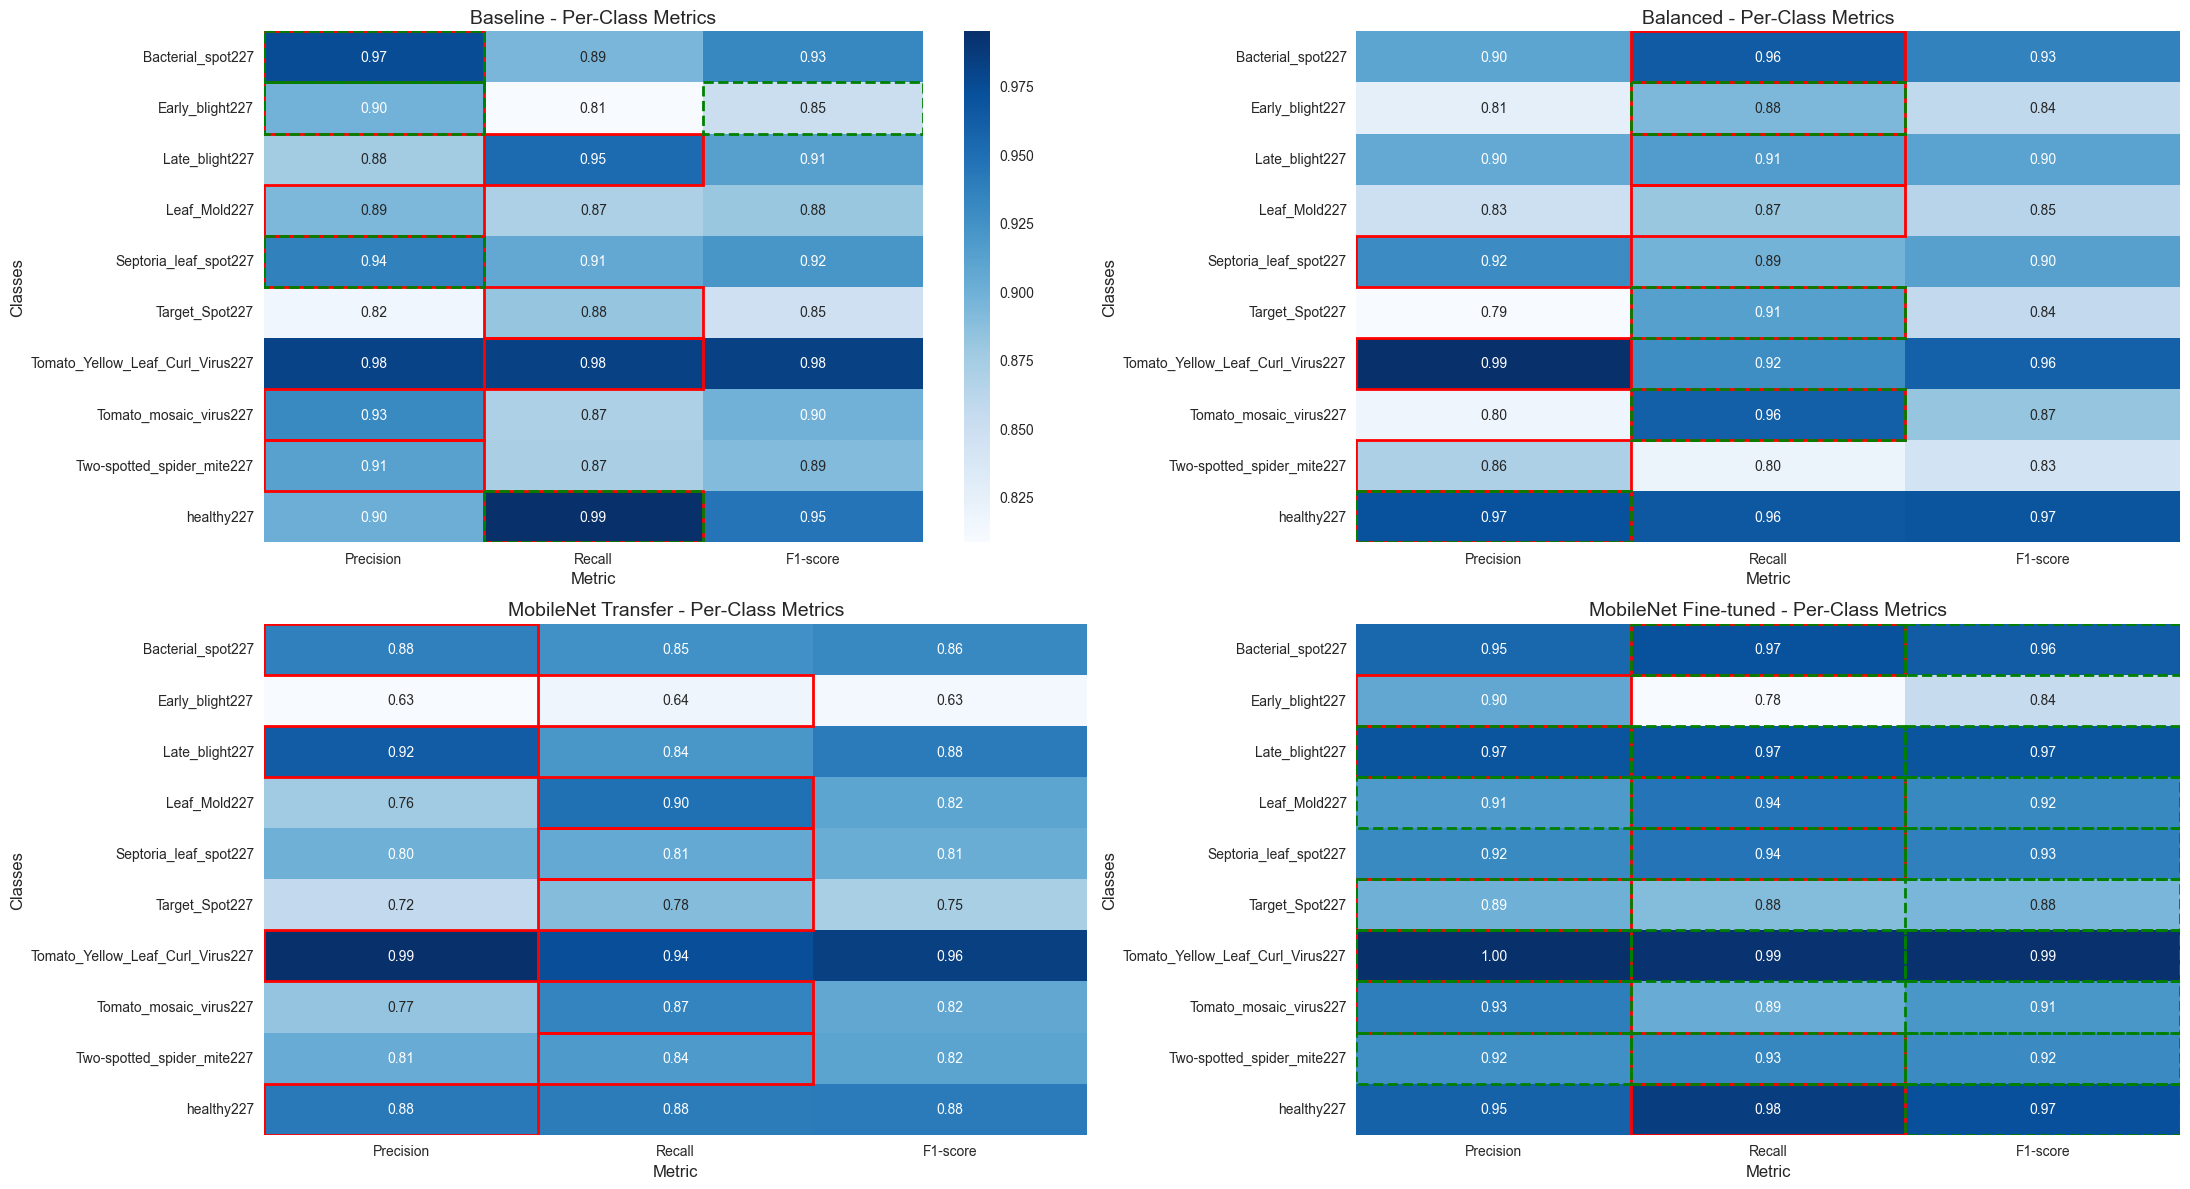

In [19]:
from sklearn.metrics import precision_score, recall_score, f1_score

model_names = list(evaluation_results.keys())
num_classes = len(class_names)

# Compute per-class metrics for all models
per_class_metrics = {}
for name in model_names:
    y_true = evaluation_results[name]['y_true']
    y_pred = evaluation_results[name]['y_pred']
    
    precision = precision_score(y_true, y_pred, average=None)
    recall = recall_score(y_true, y_pred, average=None)
    f1 = f1_score(y_true, y_pred, average=None)
    
    per_class_metrics[name] = np.stack([precision, recall, f1], axis=1)  # shape (num_classes, 3)

#  Find best metric per class across all models 
best_metrics_overall = np.zeros((num_classes, 3))
best_models_overall = np.full((num_classes, 3), '', dtype=object)

for idx, metric_name in enumerate(['Precision', 'Recall', 'F1']):
    for c in range(num_classes):
        best_val = -1
        best_model = ''
        for model in model_names:
            val = per_class_metrics[model][c, idx]
            if val > best_val:
                best_val = val
                best_model = model
        best_metrics_overall[c, idx] = best_val
        best_models_overall[c, idx] = best_model

# Plot 2x2 heatmaps with highlights
fig, axes = plt.subplots(2, 2, figsize=(22, 12))

for idx, name in enumerate(model_names):
    ax = axes[idx//2, idx%2]
    data = per_class_metrics[name]
    
    sns.heatmap(data,
                annot=True, fmt='.2f', cmap='Blues',
                xticklabels=['Precision', 'Recall', 'F1-score'],
                yticklabels=class_names,
                cbar=(idx==0),
                ax=ax)
    
    # Highlight best metric in the model (red)
    for i in range(num_classes):
        best_metric_idx = np.argmax(data[i])
        ax.add_patch(plt.Rectangle((best_metric_idx, i), 1, 1, fill=False, edgecolor='red', lw=2))
    
    # Highlight overall best metric across all models (green)
    for i in range(num_classes):
        for j in range(3):
            if best_models_overall[i, j] == name:
                ax.add_patch(plt.Rectangle((j, i), 1, 1, fill=False, edgecolor='green', lw=2, linestyle='--'))
    
    ax.set_title(f"{name} - Per-Class Metrics", fontsize=14)
    ax.set_ylabel("Classes", fontsize=12)
    ax.set_xlabel("Metric", fontsize=12)

plt.tight_layout()
plt.show()


The fine-tuned MobileNet model achieved the best overall performance, with recall standing out as the most important metric for reliable disease detection. Its high recall (0.97–0.98) ensures nearly all diseased leaves are correctly identified, minimizing missed cases. This makes the fine-tuned model the most effective choice for tomato leaf disease detection.

Evaluating Baseline ...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

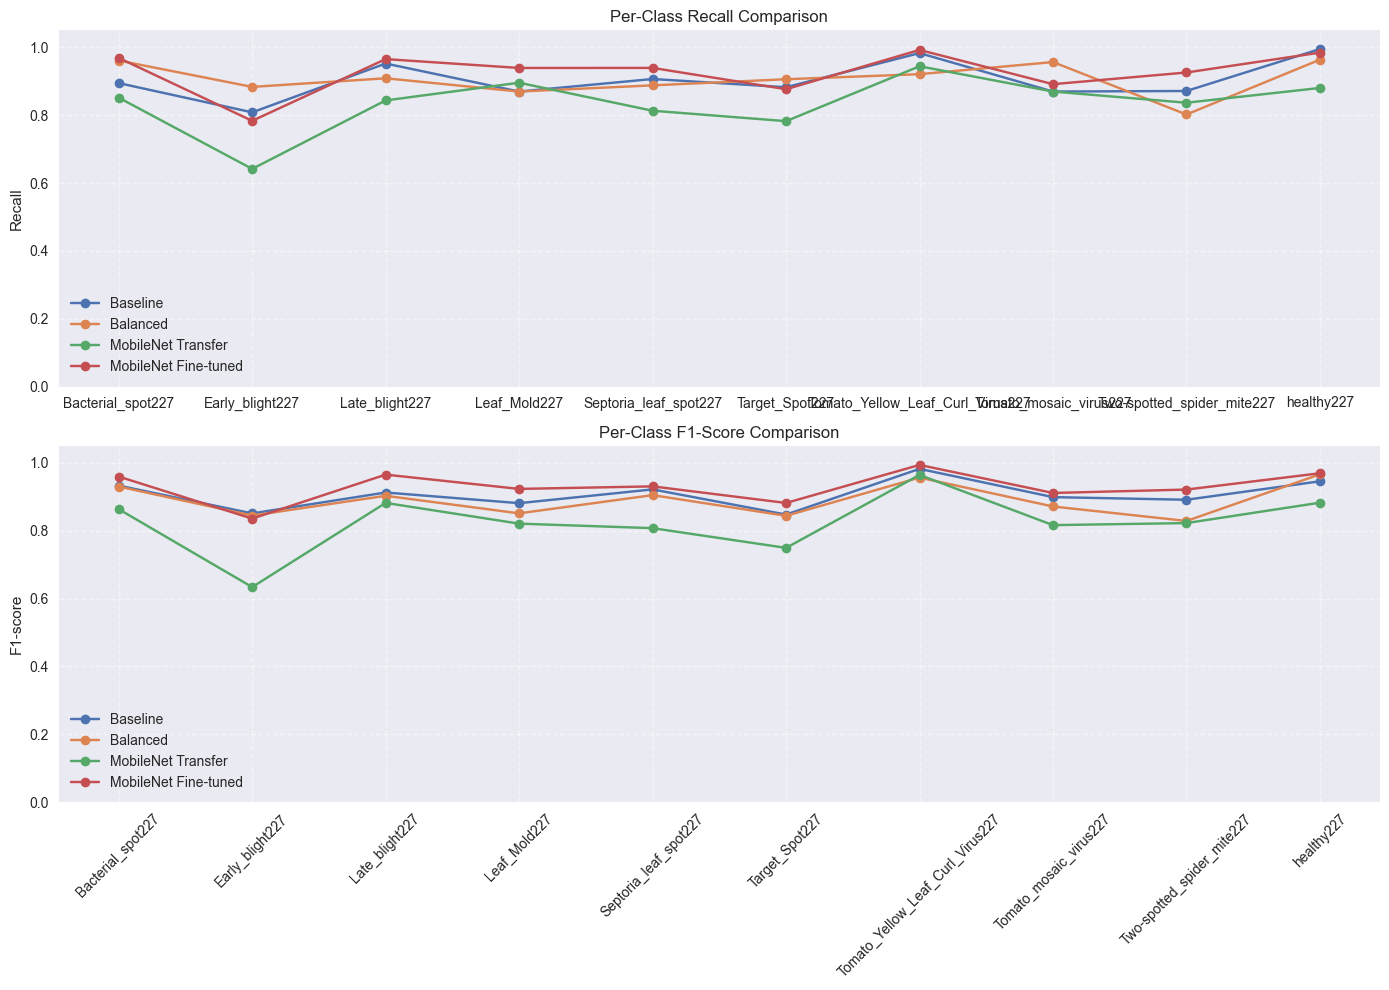

In [20]:
from sklearn.metrics import recall_score, f1_score
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing functions per model
def preprocess_mobilenet(images, labels):
    images = tf.image.resize(images, [224, 224])
    images = tf.keras.applications.mobilenet_v2.preprocess_input(images)
    return images, labels

def preprocess_baseline(images, labels):
    images = tf.image.resize(images, [128, 128])  # baseline input size
    return images, labels

# Load models
models_dict = {
    "Baseline": load_model("best_model.keras"),
    "Balanced": load_model("best_balanced_model.keras"),
    "MobileNet Transfer": load_model("best_mobilenet_transfer.keras"),
    "MobileNet Fine-tuned": load_model("best_mobilenet_finetuned.keras")
}

#  Evaluate models for per-class recall and F1
eval_batch_size = 32
per_class_metrics = {}

for name, model in models_dict.items():
    print(f"Evaluating {name} ...")
    
    # select preprocessing
    if "MobileNet" in name:
        ds = test_ds.unbatch().map(preprocess_mobilenet)
    else:
        ds = test_ds.unbatch().map(preprocess_baseline)
    
    ds = ds.batch(eval_batch_size).prefetch(tf.data.AUTOTUNE)
    
    y_true, y_pred = [], []
    for batch_images, batch_labels in ds:
        preds = model.predict(batch_images)
        y_pred.extend(np.argmax(preds, axis=1))
        y_true.extend(batch_labels.numpy())
    
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    
    # Per-class recall and F1
    recall_per_class = recall_score(y_true, y_pred, average=None)
    f1_per_class = f1_score(y_true, y_pred, average=None)
    
    per_class_metrics[name] = {
        "recall": recall_per_class,
        "f1": f1_per_class
    }

# Plot per-class recall and F1 for all models
classes = class_names
num_classes = len(classes)

fig, axes = plt.subplots(2, 1, figsize=(14, 10))

# Recall plot
for name, metrics in per_class_metrics.items():
    axes[0].plot(classes, metrics['recall'], marker='o', label=name)
axes[0].set_ylim(0, 1.05)
axes[0].set_ylabel("Recall")
axes[0].set_title("Per-Class Recall Comparison")
axes[0].legend()
axes[0].grid(True, linestyle='--', alpha=0.5)

# F1-score plot
for name, metrics in per_class_metrics.items():
    axes[1].plot(classes, metrics['f1'], marker='o', label=name)
axes[1].set_ylim(0, 1.05)
axes[1].set_ylabel("F1-score")
axes[1].set_title("Per-Class F1-Score Comparison")
axes[1].legend()
axes[1].grid(True, linestyle='--', alpha=0.5)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


The fine-tuned MobileNet model achieved the highest and most consistent recall and F1-scores across all classes. It especially improved performance on challenging diseases like Early_blight227 and Two-spotted_spider_mite227. The frozen transfer model and class-balanced approach showed moderate gains but lagged behind. Overall, fine-tuning clearly enhanced the model’s adaptability and generalization to leaf disease features.

overall the bestmodel is MobileNet_fine_tunned

# Conclusion

The modeling workflow for tomato leaf disease classification was executed systematically, including data preprocessing, dataset balancing, and transfer learning with MobileNetV2. Initial frozen training provided a strong baseline with 86% test accuracy, while fine-tuning the top layers further improved overall performance to 95% test accuracy, demonstrating robust learning and generalization. Metrics such as precision, recall, and F1-score indicate reliable classification across both majority and minority classes

# Recommendations

1. Deployment: The fine-tuned MobileNetV2 model is ready for deployment in real-time disease detection systems, either on  mobile devices or cloud platforms.

2. Maintenance & Adaptation: Continuous monitoring and retraining with new data are recommended to preserve accuracy and adapt to changing disease patterns.

3. Future Enhancements: Further optimization, including exploring complementary architectures or ensembling strategies, may improve classification of challenging classes and strengthen overall robustness.

4. Resource Planning: For future modeling, use appropriately sized images, controlled batch sizes, and adequate GPU resources to prevent memory bottlenecks and ensure efficient training.